In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/8


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')


In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [ ]:
df.describe(include='O').transpose()

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6529,3,Medium,3925
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Learning_Disabilities,6607,2,No,5912


In [ ]:
df.nunique()

,0
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2
Tutoring_Sessions,9


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df['Exam_Score'] == 101]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


# Split the data into Training, Validation, and Test sets

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


In [ ]:
X=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

In [ ]:
X_train_strat, X_temp_strat, y_train_strat, y_temp_strat = train_test_split(X, y, test_size=0.4, random_state=42, stratify=X['Gender'])
X_val_strat, X_test_strat, y_val_strat, y_test_strat = train_test_split(X_temp_strat, y_temp_strat, test_size=0.5, random_state=42, stratify= X_temp_strat['Gender'])

print("\nValue Counts for Gender (Stratified Split):")
print("Training set (Gender):")
print(X_train_strat['Gender'].value_counts(normalize=True))
print("\nValidation set (Gender):")
print(X_val_strat['Gender'].value_counts(normalize=True))
print("\nTest set (Gender):")
print(X_test_strat['Gender'].value_counts(normalize=True))


Value Counts for Gender (Stratified Split):
Training set (Gender):
Gender
Male      0.577195
Female    0.422805
Name: proportion, dtype: float64

Validation set (Gender):
Gender
Male      0.577593
Female    0.422407
Name: proportion, dtype: float64

Test set (Gender):
Gender
Male      0.577156
Female    0.422844
Name: proportion, dtype: float64


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=X['Gender'])

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify= X_temp_strat['Gender'])

In [ ]:
print(f"Training set (X_train, y_train) shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set (X_val, y_val) shape: {X_val.shape}, {y_val.shape}")
print(f"Test set (X_test, y_test) shape: {X_test.shape}, {y_test.shape}")

Training set (X_train, y_train) shape: (3964, 19), (3964,)
Validation set (X_val, y_val) shape: (1321, 19), (1321,)
Test set (X_test, y_test) shape: (1322, 19), (1322,)


In [ ]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

#EDA

### Analyze the target variable

In [ ]:
df['Exam_Score'].value_counts()

,count
Exam_Score,
68,759
66,751
67,717
65,679
69,624
70,542
64,501
71,408
63,371


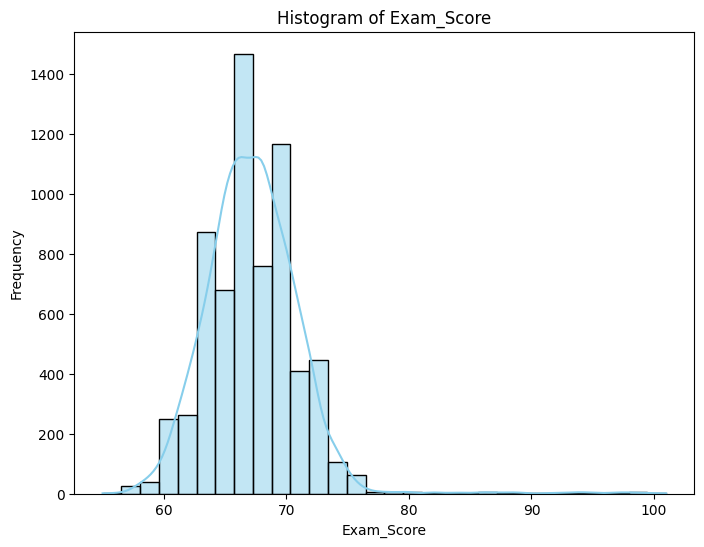

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Exam_Score')
plt.xlabel('Exam_Score')
plt.ylabel('Frequency')
plt.show()

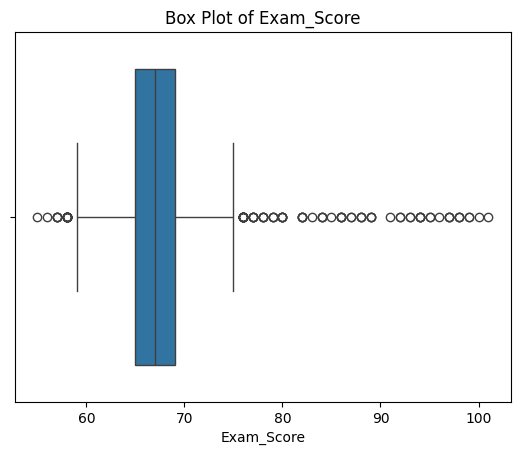

In [ ]:

sns.boxplot(x=df['Exam_Score'])
plt.title('Box Plot of Exam_Score')
plt.xlabel('Exam_Score')
plt.show()

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


### Look for Missing Values

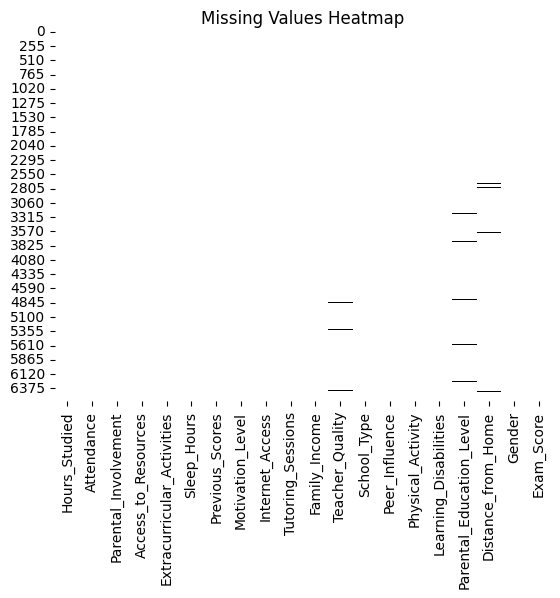

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='binary')
plt.title('Missing Values Heatmap')
plt.show()

### Explore relationships between features and the target variable

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,3814
Female,2793


Distribution Exam Score by Gender

<ipython-input-23-8e523a7fe634>:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Gender', y='Exam_Score', data=df, inner='box', scale='count')


Text(0, 0.5, 'Exam_Score')

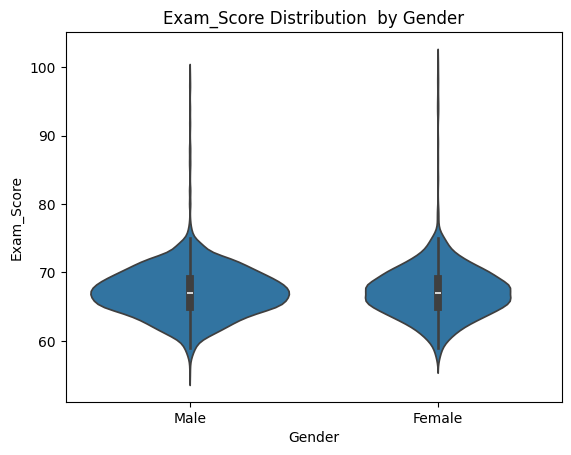

In [ ]:
sns.violinplot(x='Gender', y='Exam_Score', data=df, inner='box', scale='count')
plt.title('Exam_Score Distribution  by Gender')
plt.xlabel('Gender')
plt.ylabel('Exam_Score')

Hours Studied vs Exam Score

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

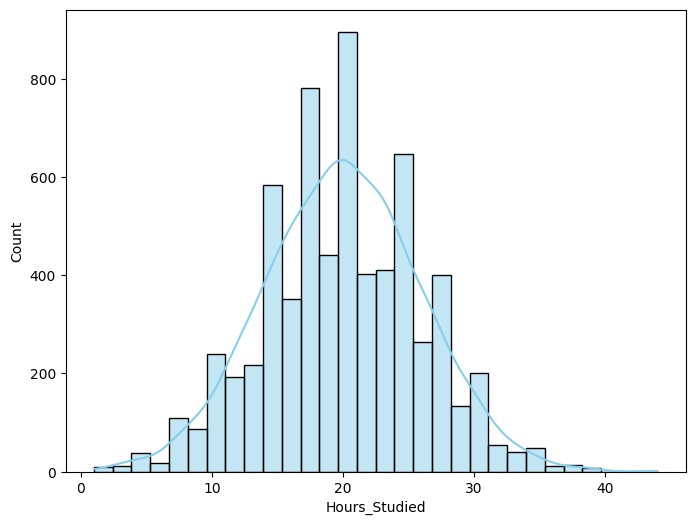

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Hours_Studied'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt

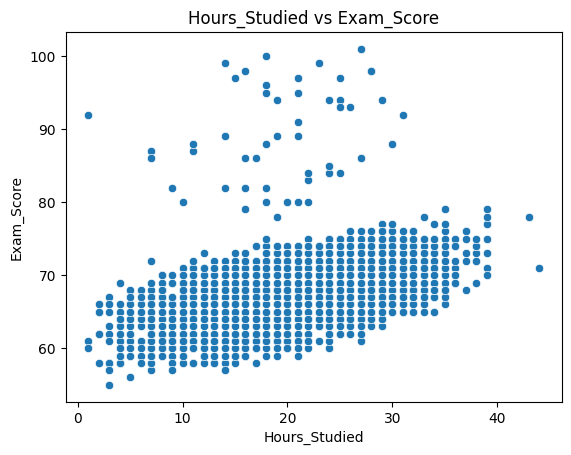

In [ ]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Hours_Studied vs Exam_Score')
plt.show()

Attendance vs Exam Score

<ipython-input-26-9343422a52f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attendance', data=df, palette='rainbow')


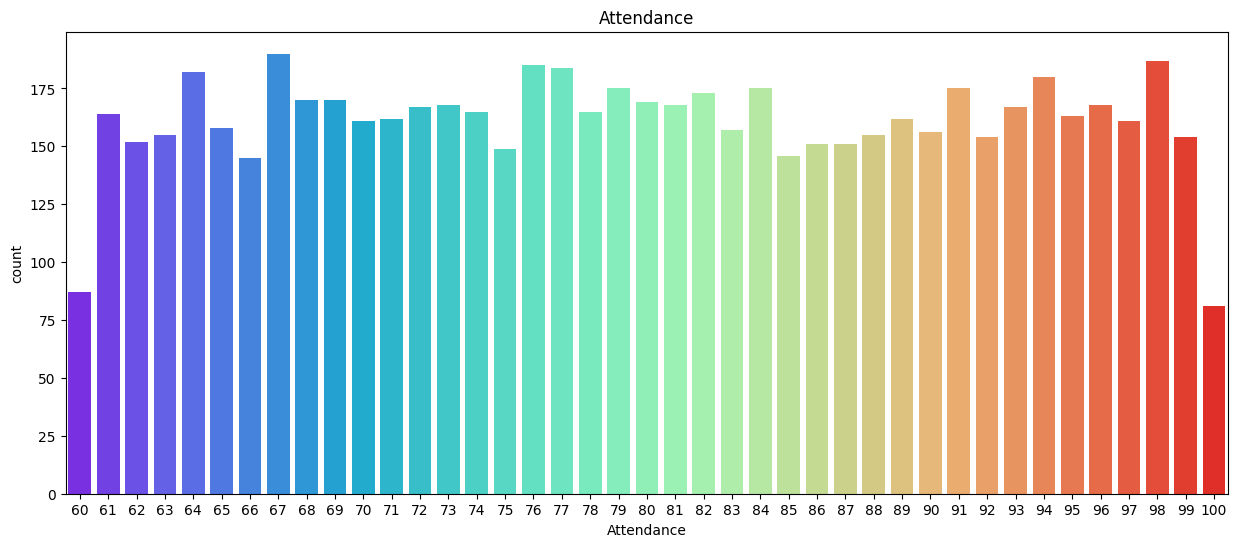

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Attendance', data=df, palette='rainbow')
plt.title('Attendance')
plt.show()

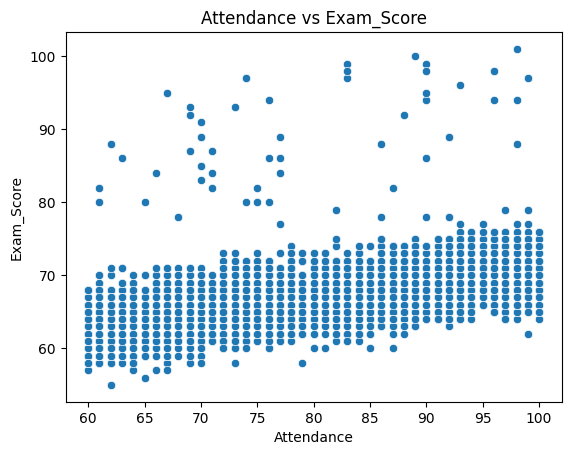

In [ ]:
sns.scatterplot(x='Attendance', y='Exam_Score', data=df)
plt.title('Attendance vs Exam_Score')
plt.show()

Parental Involvement vs Exam Score

In [ ]:
df['Parental_Involvement'].value_counts()

,count
Parental_Involvement,
Medium,3362
High,1908
Low,1337


<ipython-input-29-c04b65fc43e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parental_Involvement', data=df, palette='rainbow')


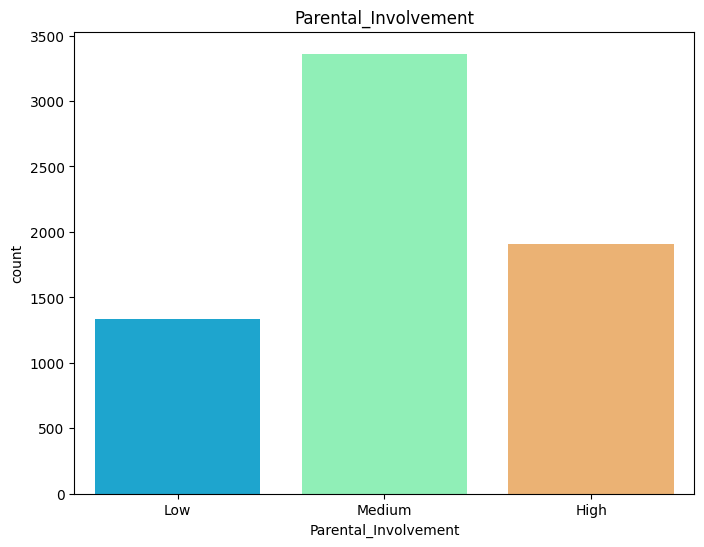

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Parental_Involvement', data=df, palette='rainbow')
plt.title('Parental_Involvement')
plt.show()


<ipython-input-30-c038d320715c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parental_Involvement', y='Exam_Score', data=df, palette='rainbow',legend=False)


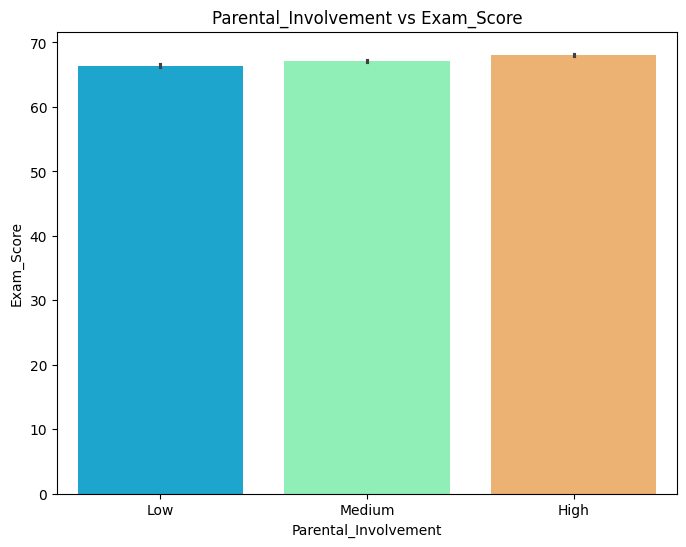

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Parental_Involvement', y='Exam_Score', data=df, palette='rainbow',legend=False)
plt.title('Parental_Involvement vs Exam_Score')
plt.show()

Access_to_Resources vs Exam_Score


<ipython-input-31-ba4e10ed3a01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Access_to_Resources', data=df,palette='rainbow')


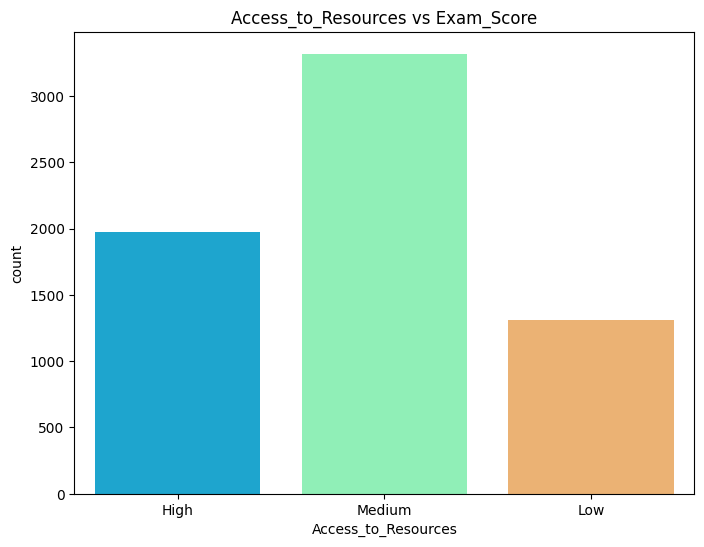

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Access_to_Resources', data=df,palette='rainbow')
plt.title('Access_to_Resources vs Exam_Score')
plt.show()

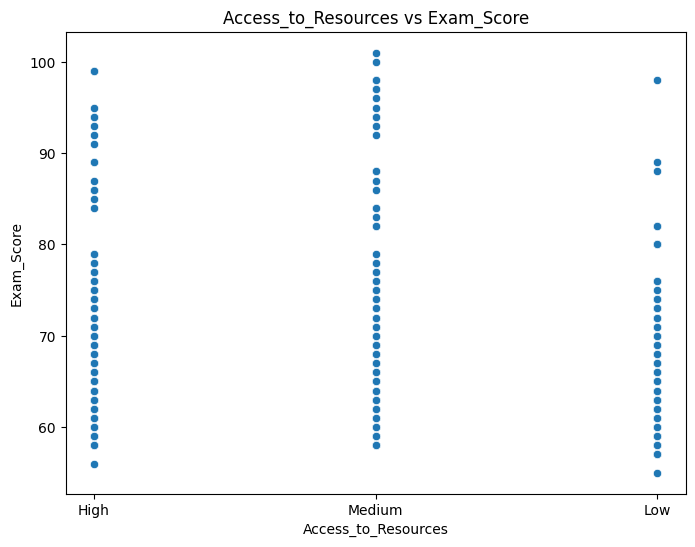

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Access_to_Resources', y='Exam_Score', data=df)
plt.title('Access_to_Resources vs Exam_Score')
plt.show()

<ipython-input-33-ef0bc2141522>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Access_to_Resources', y='Exam_Score', data=df,palette='rainbow')


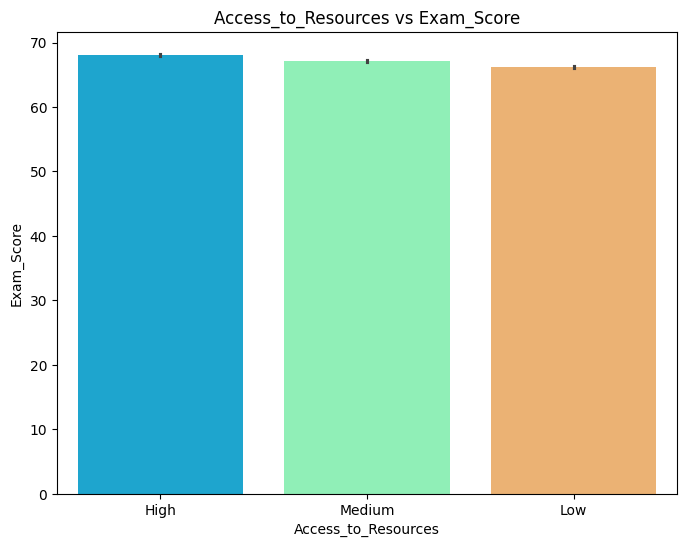

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Access_to_Resources', y='Exam_Score', data=df,palette='rainbow')
plt.title('Access_to_Resources vs Exam_Score')
plt.show()

Extracurricular_Activities

In [ ]:
df['Extracurricular_Activities'].value_counts()

,count
Extracurricular_Activities,
Yes,3938
No,2669


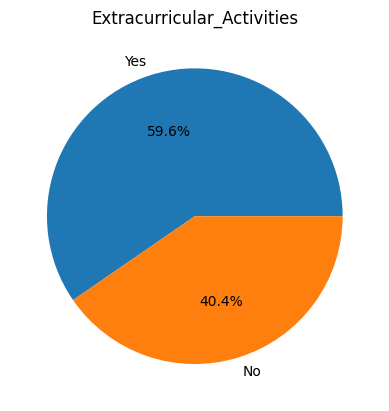

In [ ]:
plt.pie(df['Extracurricular_Activities'].value_counts(), labels=df['Extracurricular_Activities'].value_counts().index, autopct='%1.1f%%')
plt.title('Extracurricular_Activities')
plt.show()

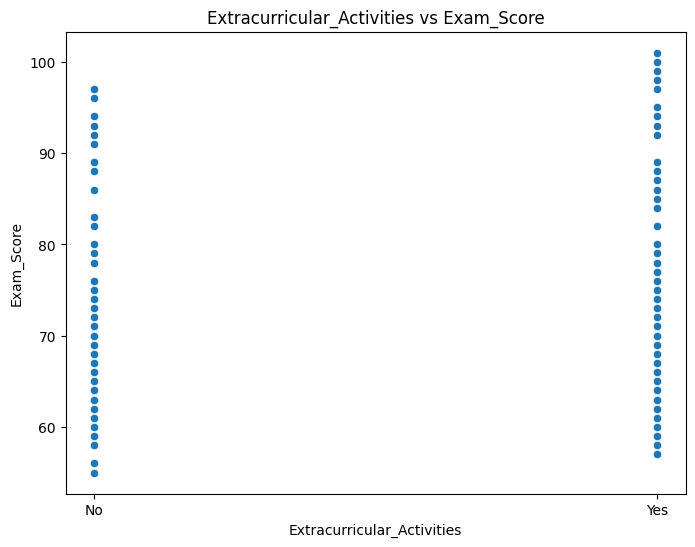

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Extracurricular_Activities', y='Exam_Score', data=df)
plt.title('Extracurricular_Activities vs Exam_Score')
plt.show()



Without log Scale




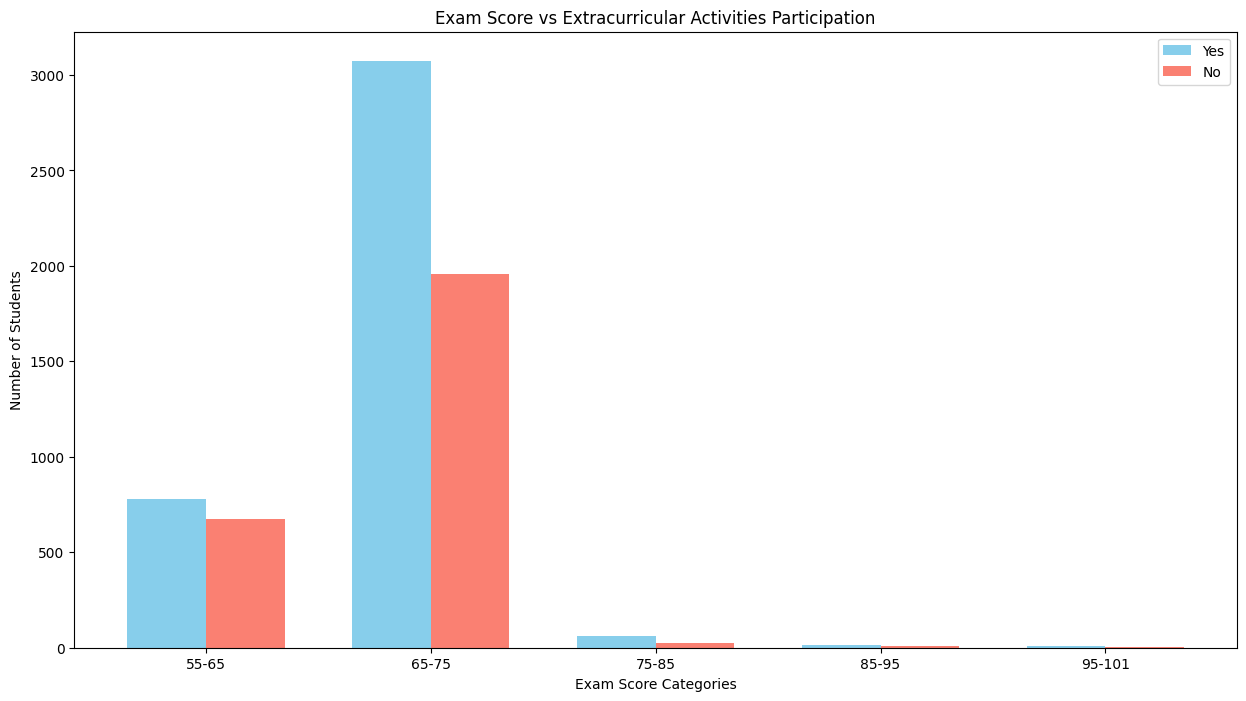

In [ ]:


bins = [55, 65, 75, 85, 95, 101]
labels = ['55-65', '65-75', '75-85', '85-95', '95-101']

yes = pd.cut(df[df['Extracurricular_Activities'] == 'Yes']['Exam_Score'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().reindex(labels, fill_value=0)
no = pd.cut(df[df['Extracurricular_Activities'] == 'No']['Exam_Score'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(15, 8))

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, yes, width, label='Yes', color='skyblue')

plt.bar(x + width/2, no, width, label='No', color='salmon')

plt.xlabel('Exam Score Categories')
plt.ylabel('Number of Students')
plt.title('Exam Score vs Extracurricular Activities Participation')
plt.xticks(x, labels)
plt.legend()

plt.show()

With log scale

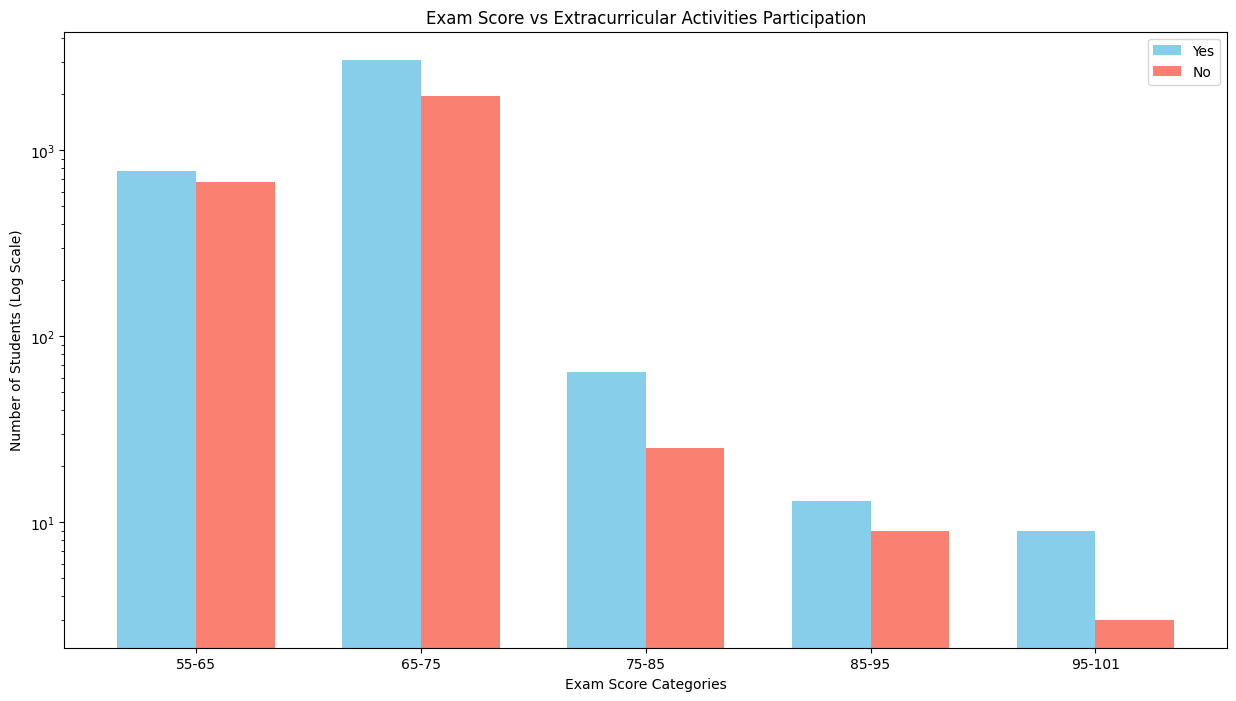

In [ ]:

bins = [55, 65, 75, 85, 95, 101]
labels = ['55-65', '65-75', '75-85', '85-95', '95-101']

yes = pd.cut(df[df['Extracurricular_Activities'] == 'Yes']['Exam_Score'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().reindex(labels, fill_value=0 )
no = pd.cut(df[df['Extracurricular_Activities'] == 'No']['Exam_Score'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(15, 8))

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, yes, width, label='Yes', color='skyblue')
plt.bar(x + width/2, no, width, label='No', color='salmon')

plt.yscale('log')

plt.xlabel('Exam Score Categories')
plt.ylabel('Number of Students (Log Scale)')
plt.title('Exam Score vs Extracurricular Activities Participation')
plt.xticks(x, labels)
plt.legend()

plt.show()

Sleep_Hours

In [ ]:
df['Sleep_Hours'].value_counts()

,count
Sleep_Hours,
7,1741
8,1399
6,1376
9,775
5,695
10,312
4,309


<ipython-input-40-678c21e2530d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep_Hours', data=df,palette='rainbow')


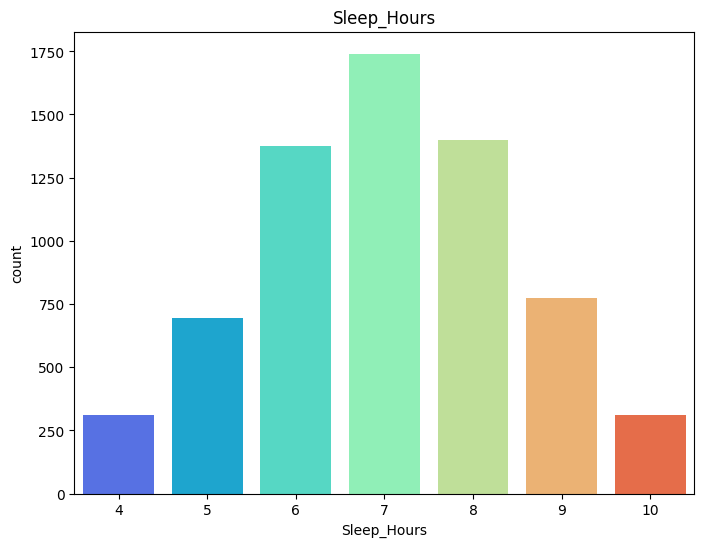

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep_Hours', data=df,palette='rainbow')
plt.title('Sleep_Hours')
plt.show()

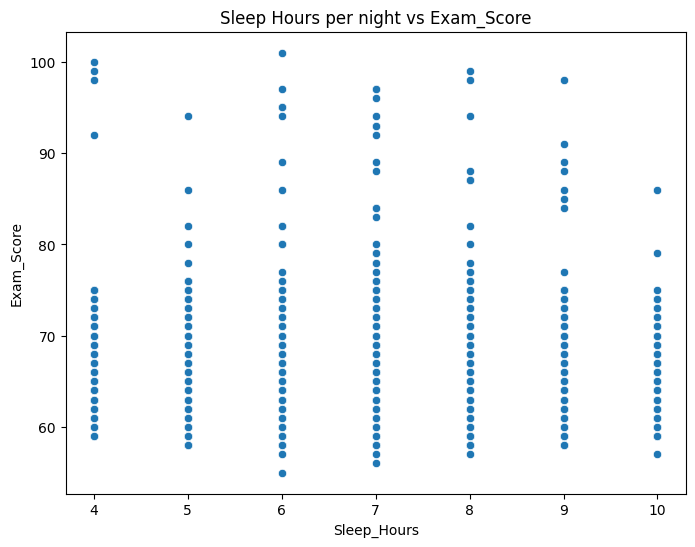

In [ ]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=df)
plt.title('Sleep Hours per night vs Exam_Score')
plt.show()


Previous_Scores

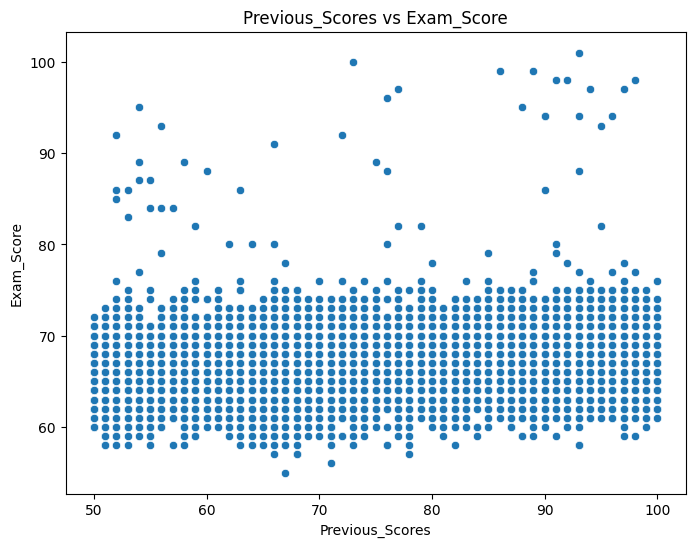

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=df)
plt.title('Previous_Scores vs Exam_Score')
plt.show()

In [ ]:
#Motivation_Level	Internet_Access	Tutoring_Sessions	Family_Income	Teacher_Quality	School_Type

Motivation_Level

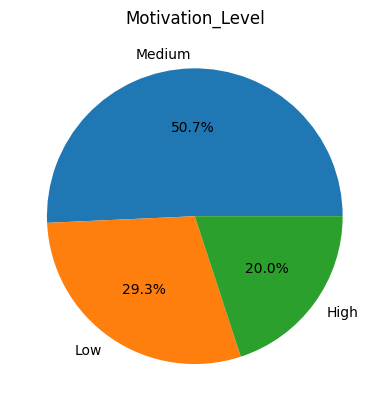

In [ ]:
plt.pie(df['Motivation_Level'].value_counts(), labels=df['Motivation_Level'].value_counts().index, autopct='%1.1f%%')
plt.title('Motivation_Level')
plt.show()


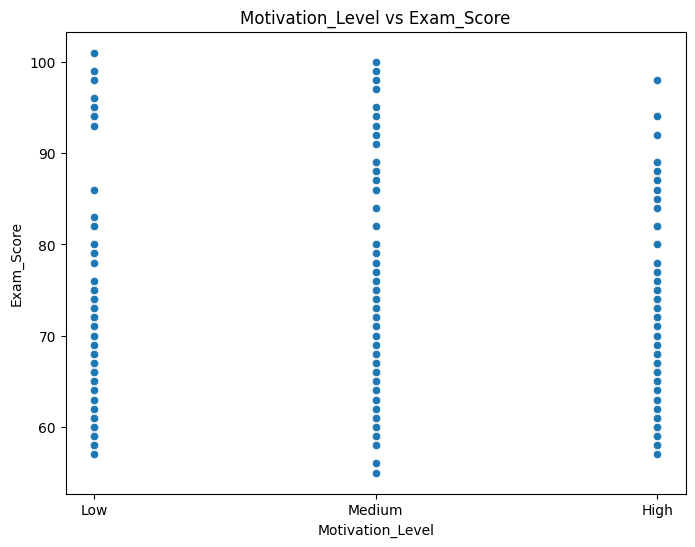

<ipython-input-45-c4f4facab70a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Motivation_Level', y='Exam_Score', data=df,palette='rainbow')


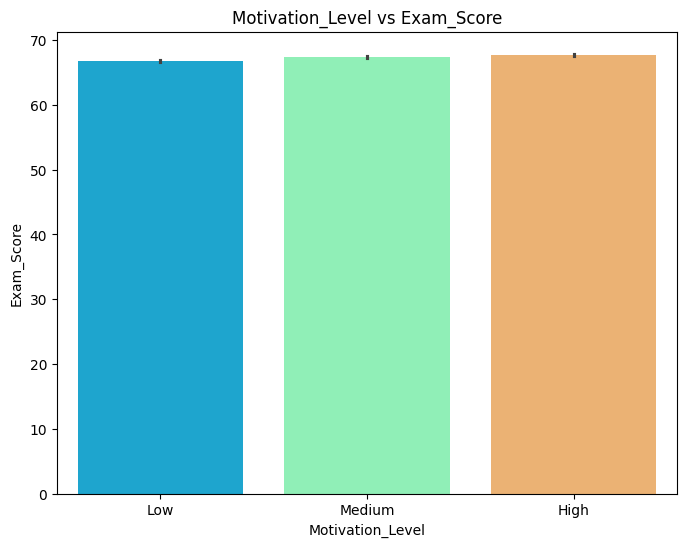

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Motivation_Level', y='Exam_Score', data=df)
plt.title('Motivation_Level vs Exam_Score')
plt.show()
plt.figure(figsize=(8, 6))
sns.barplot(x='Motivation_Level', y='Exam_Score', data=df,palette='rainbow')
plt.title('Motivation_Level vs Exam_Score')
plt.show()


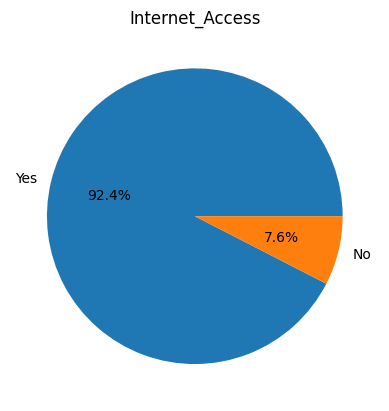

In [ ]:
plt.pie(df['Internet_Access'].value_counts(), labels=df['Internet_Access'].value_counts().index, autopct='%1.1f%%')
plt.title('Internet_Access')
plt.show()

<ipython-input-47-ca7515dc4c54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Internet_Access', data=df,palette='rainbow')


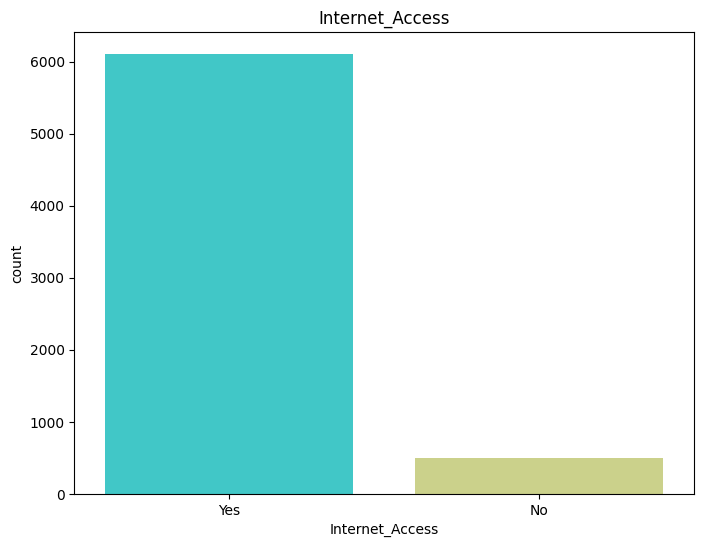

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Internet_Access', data=df,palette='rainbow')
plt.title('Internet_Access')
plt.show()



<ipython-input-48-c81131127f46>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tutoring_Sessions', data=df,palette='rainbow')


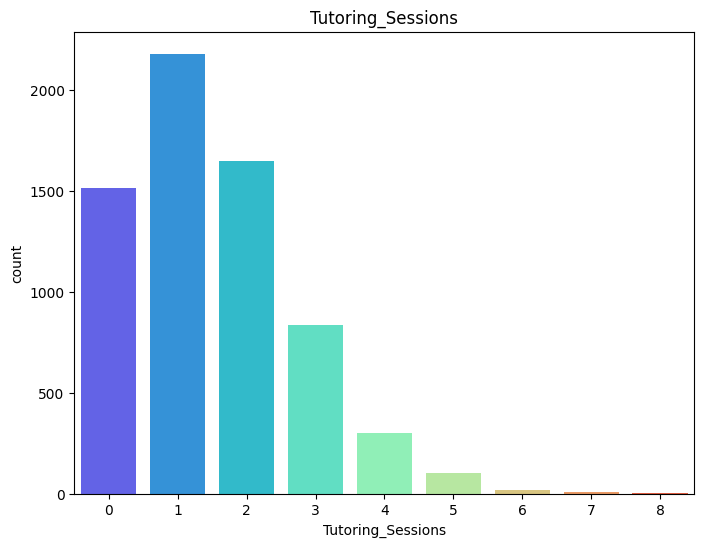

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tutoring_Sessions', data=df,palette='rainbow')
plt.title('Tutoring_Sessions')
plt.show()


Text(0.5, 1.0, 'Tutoring_Sessions vs Exam_Score')

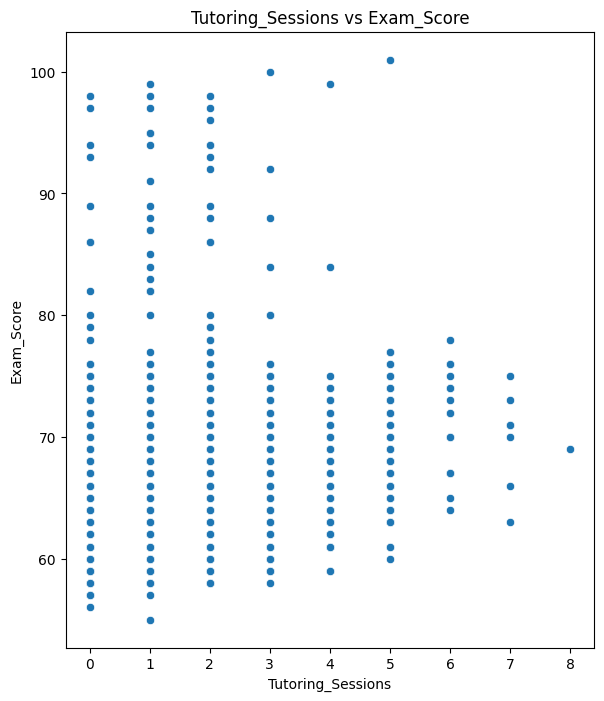

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=df)
plt.title('Tutoring_Sessions vs Exam_Score')


Family_Income

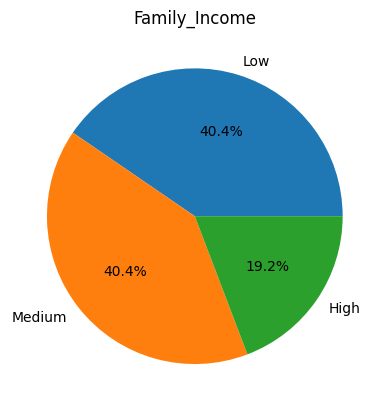

In [ ]:
plt.pie(df['Family_Income'].value_counts(), labels=df['Family_Income'].value_counts().index, autopct='%1.1f%%')
plt.title('Family_Income')
plt.show()

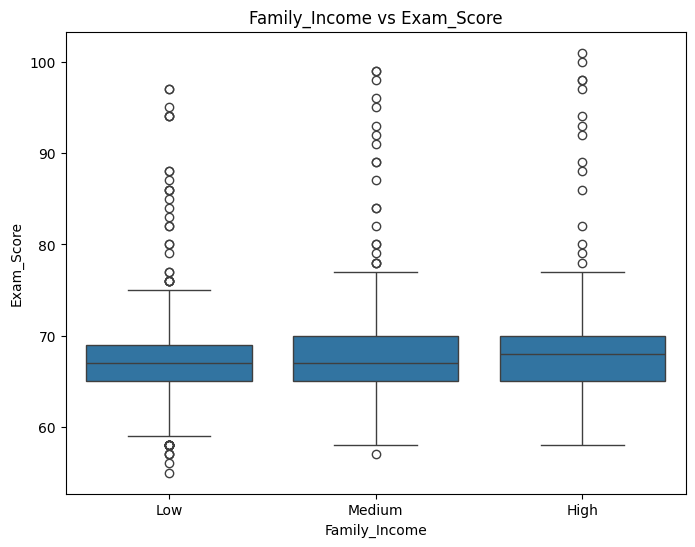

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Family_Income', y='Exam_Score', data=df)
plt.title('Family_Income vs Exam_Score')
plt.show()



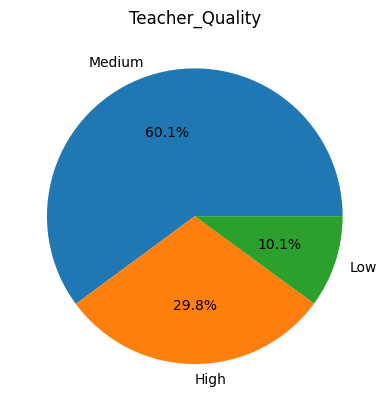

In [ ]:

plt.pie(df['Teacher_Quality'].value_counts(), labels=df['Teacher_Quality'].value_counts().index, autopct='%1.1f%%')
plt.title('Teacher_Quality')
plt.show()

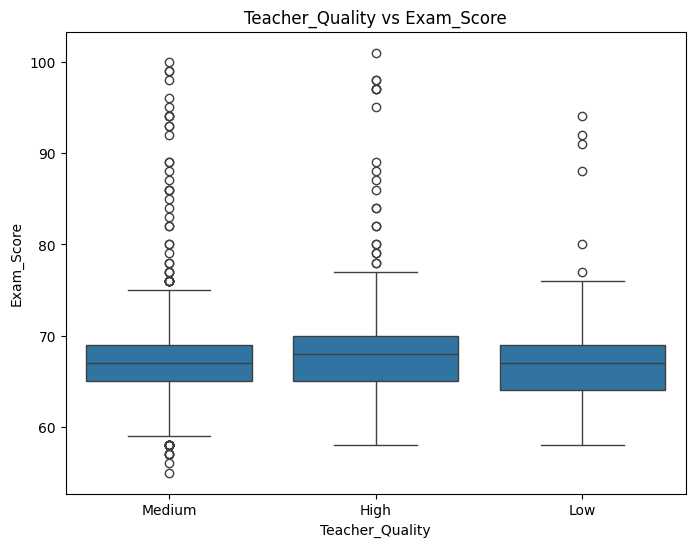

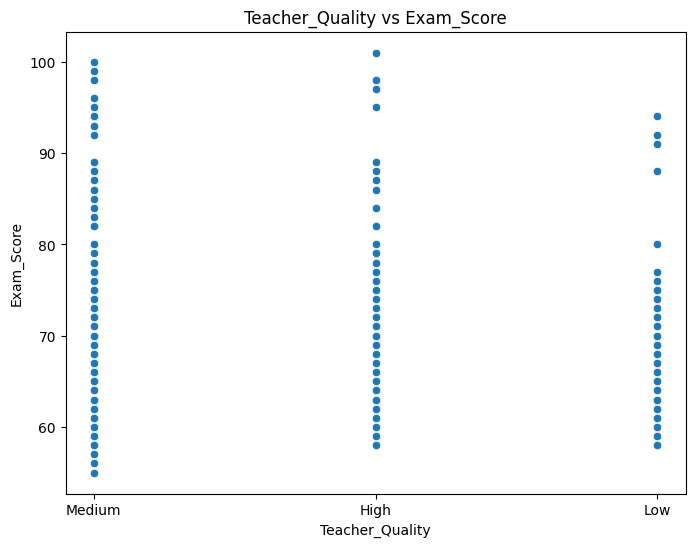

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Teacher_Quality', y='Exam_Score', data=df)
plt.title('Teacher_Quality vs Exam_Score')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Teacher_Quality', y='Exam_Score', data=df)
plt.title('Teacher_Quality vs Exam_Score')
plt.show()



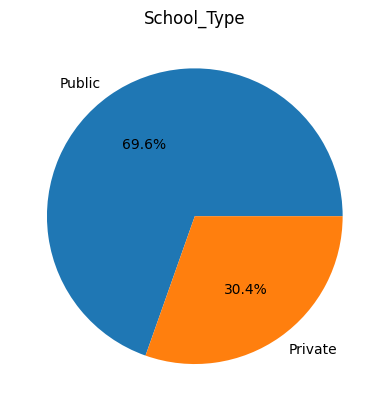

In [ ]:
#Scholl_Type
plt.pie(df['School_Type'].value_counts(), labels=df['School_Type'].value_counts().index, autopct='%1.1f%%')
plt.title('School_Type')
plt.show()

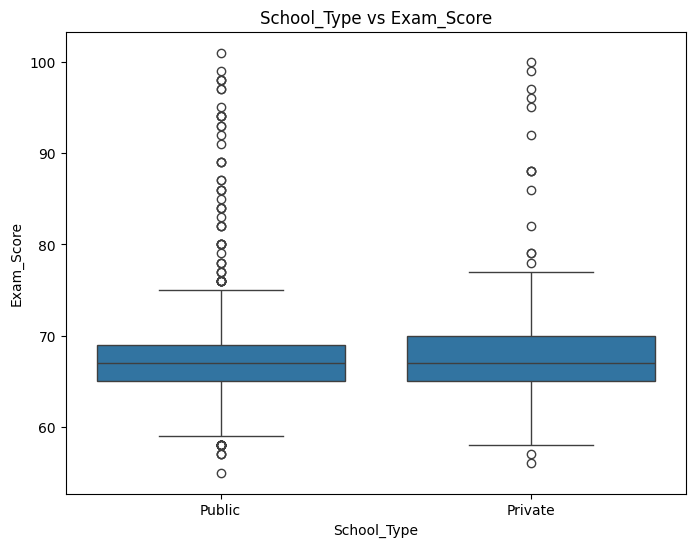

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='School_Type', y='Exam_Score', data=df)
plt.title('School_Type vs Exam_Score')
plt.show()



In [ ]:
average_scores = df.groupby('School_Type')['Exam_Score'].max()
average_scores


,Exam_Score
School_Type,
Private,100
Public,101


In [ ]:
scores_by_school_type = df.groupby('School_Type')['Exam_Score'].apply(list)
scores_by_school_type

,Exam_Score
School_Type,
Private,"[67, 69, 68, 71, 66, 65, 64, 60, 66, 64, 64, 7..."
Public,"[67, 61, 74, 71, 70, 71, 66, 72, 70, 65, 67, 6..."


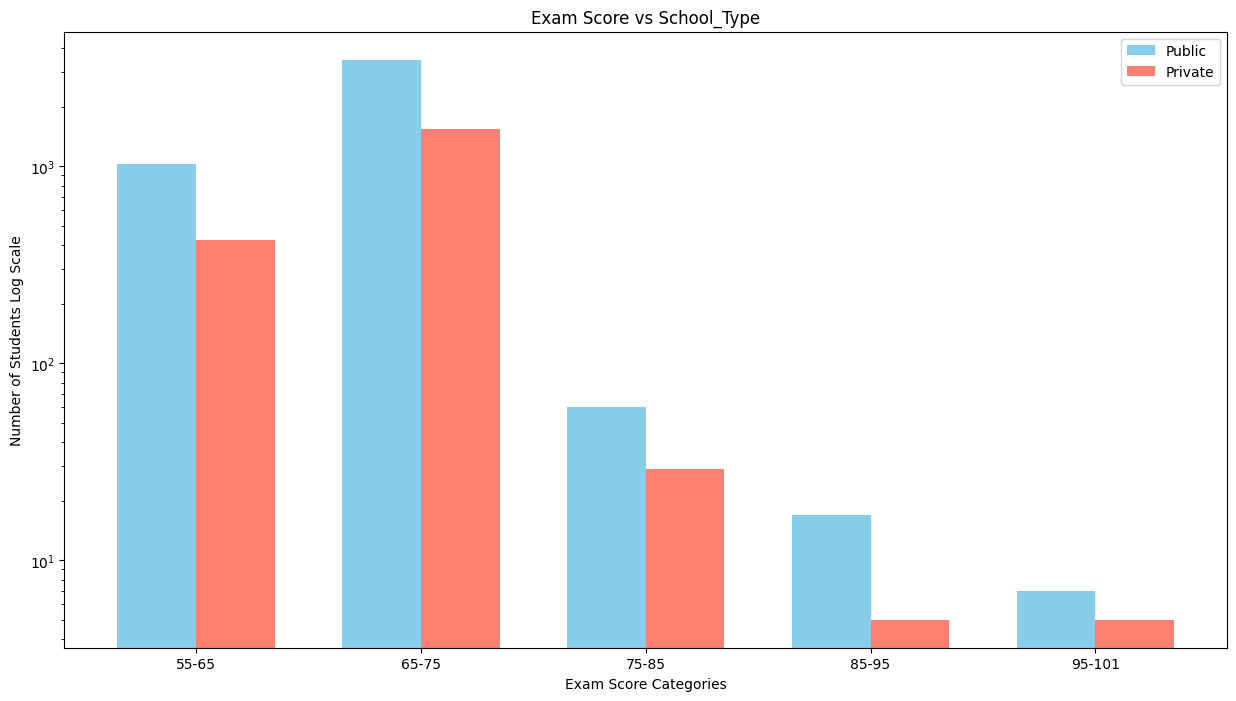

In [ ]:
bins = [55, 65, 75, 85, 95, 101]
labels = ['55-65', '65-75', '75-85', '85-95', '95-101']

Public = pd.cut(df[df['School_Type'] == 'Public']['Exam_Score'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().reindex(labels, fill_value=0)
Private = pd.cut(df[df['School_Type'] == 'Private']['Exam_Score'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(15, 8))

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, Public, width, label='Public', color='skyblue')

plt.bar(x + width/2, Private, width, label='Private', color='salmon')


plt.yscale('log')

plt.xlabel('Exam Score Categories')
plt.ylabel('Number of Students Log Scale')
plt.title('Exam Score vs School_Type')
plt.xticks(x, labels)
plt.legend()

plt.show()


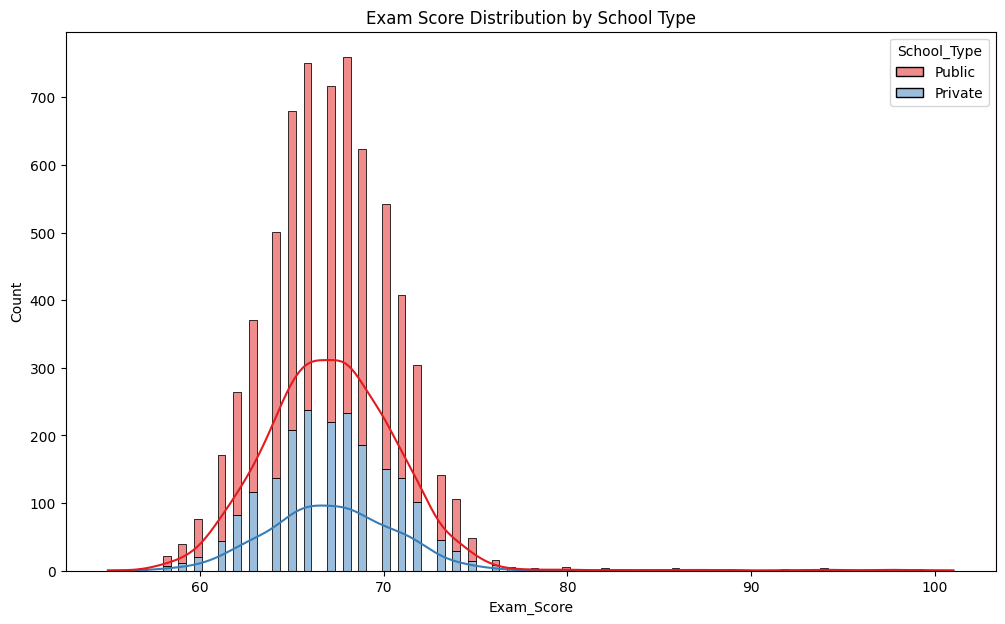

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Exam_Score', hue='School_Type', multiple="stack",kde=True, palette="Set1")
plt.title('Exam Score Distribution by School Type')
plt.show()


Peer_Influence

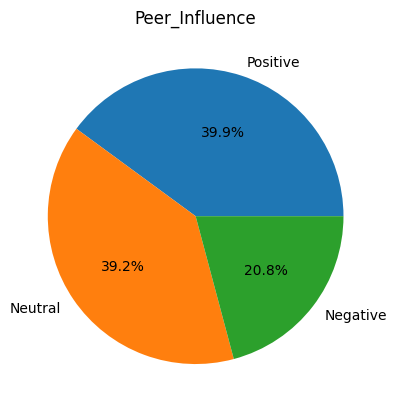

In [ ]:

plt.pie(df['Peer_Influence'].value_counts(), labels=df['Peer_Influence'].value_counts().index, autopct='%1.1f%%')
plt.title('Peer_Influence')
plt.show()

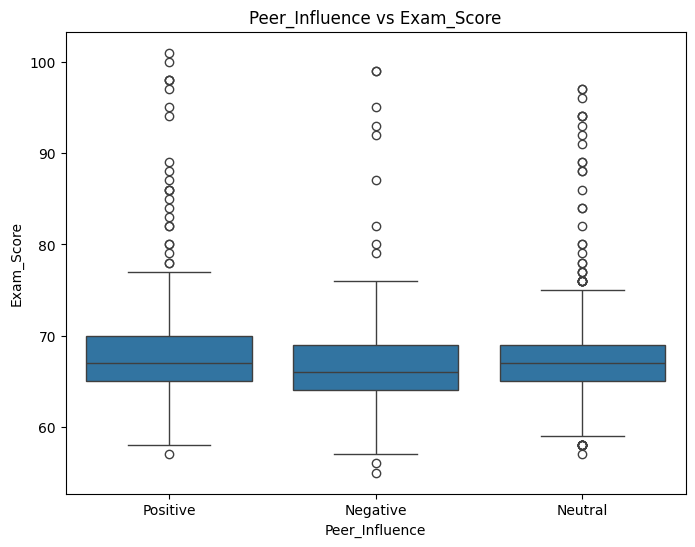

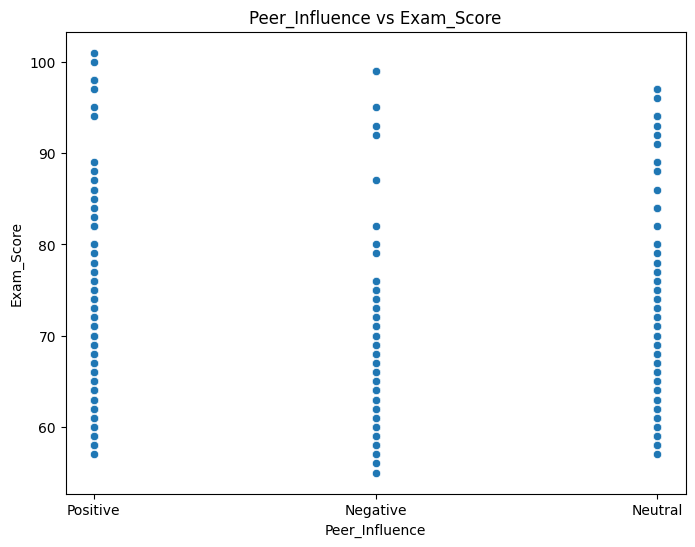

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Peer_Influence', y='Exam_Score', data=df)
plt.title('Peer_Influence vs Exam_Score')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Peer_Influence', y='Exam_Score', data=df)
plt.title('Peer_Influence vs Exam_Score')
plt.show()


Physical_Activity

<ipython-input-62-c78ae69e9c0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Physical_Activity', data=df,palette='rainbow')


Text(0.5, 1.0, 'Physical_Activity')

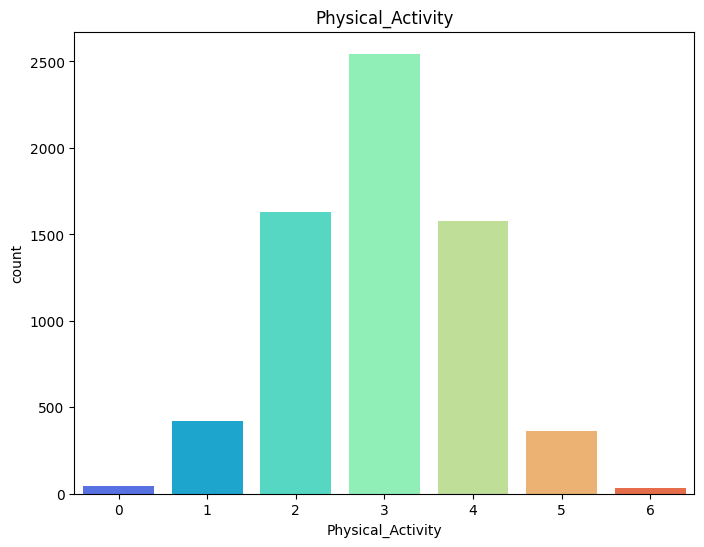

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Physical_Activity', data=df,palette='rainbow')
plt.title('Physical_Activity')


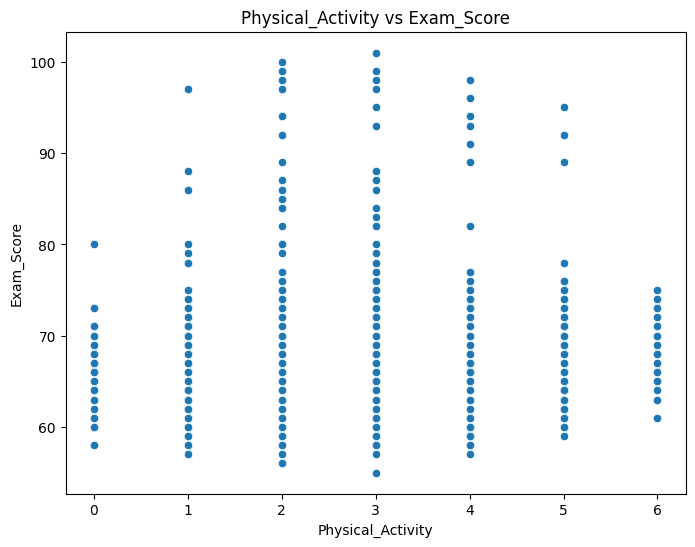

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physical_Activity', y='Exam_Score', data=df)
plt.title('Physical_Activity vs Exam_Score')
plt.show()



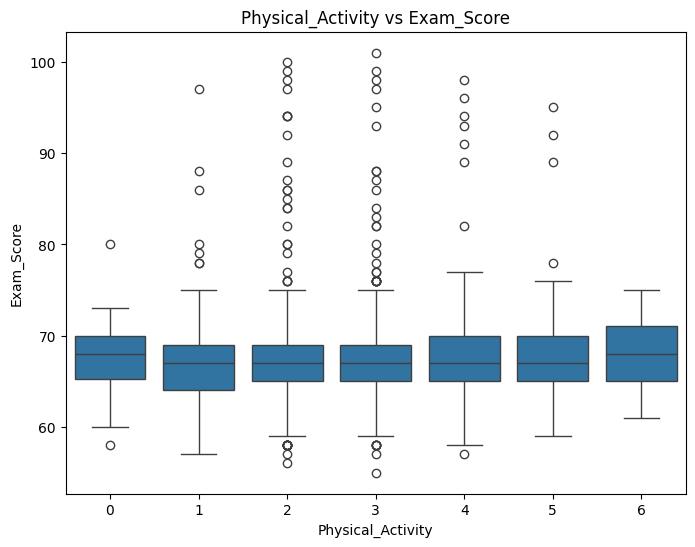

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Physical_Activity', y='Exam_Score', data=df)
plt.title('Physical_Activity vs Exam_Score')
plt.show()

Learning_Disabilities

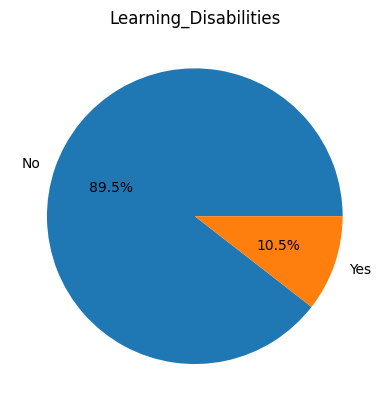

In [ ]:

plt.pie(df['Learning_Disabilities'].value_counts(), labels=df['Learning_Disabilities'].value_counts().index, autopct='%1.1f%%')
plt.title('Learning_Disabilities')
plt.show()

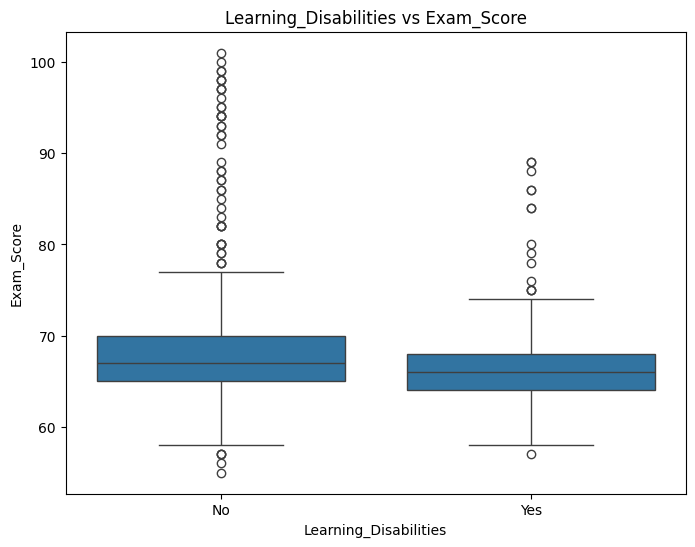

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df)
plt.title('Learning_Disabilities vs Exam_Score')
plt.show()

Parental_Education_Level

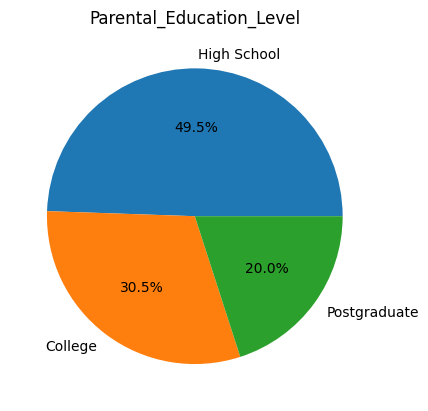

In [ ]:

plt.pie(df['Parental_Education_Level'].value_counts(), labels=df['Parental_Education_Level'].value_counts().index, autopct='%1.1f%%')
plt.title('Parental_Education_Level')
plt.show()

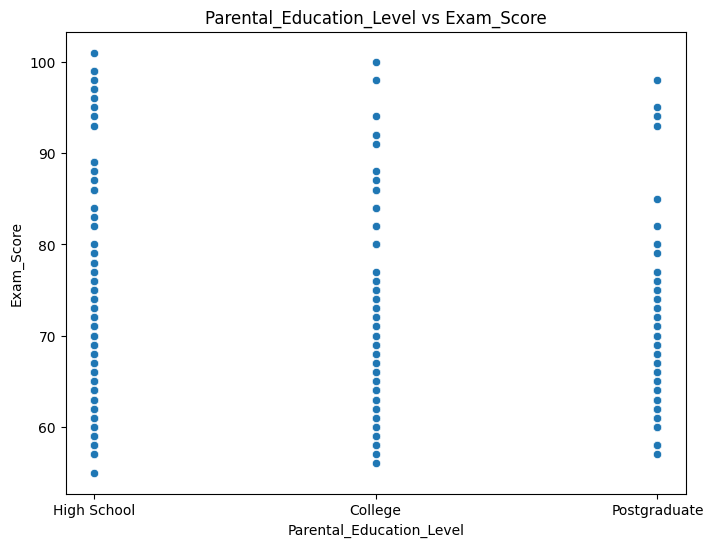

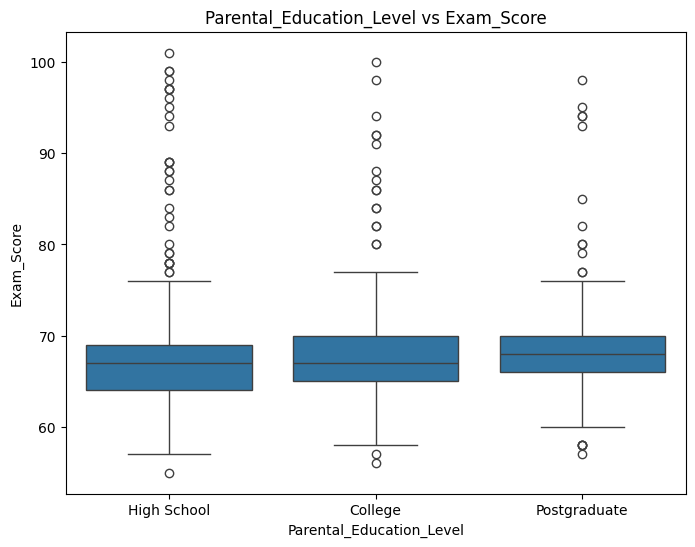

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Parental_Education_Level', y='Exam_Score', data=df)
plt.title('Parental_Education_Level vs Exam_Score')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=df)
plt.title('Parental_Education_Level vs Exam_Score')
plt.show()


* Distance_from_Home

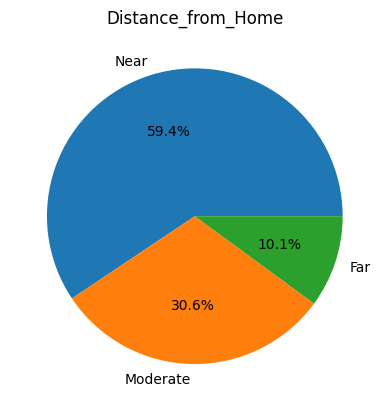

In [ ]:
plt.pie(df['Distance_from_Home'].value_counts(), labels=df['Distance_from_Home'].value_counts().index, autopct='%1.1f%%')
plt.title('Distance_from_Home')
plt.show()

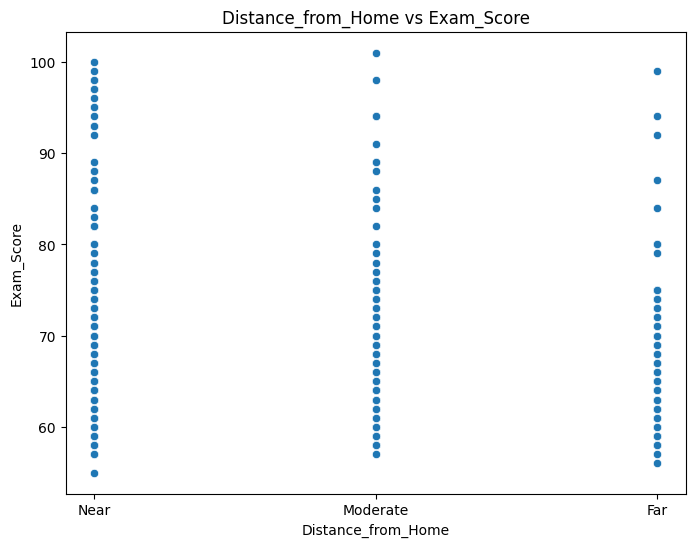

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance_from_Home', y='Exam_Score', data=df)
plt.title('Distance_from_Home vs Exam_Score')
plt.show()


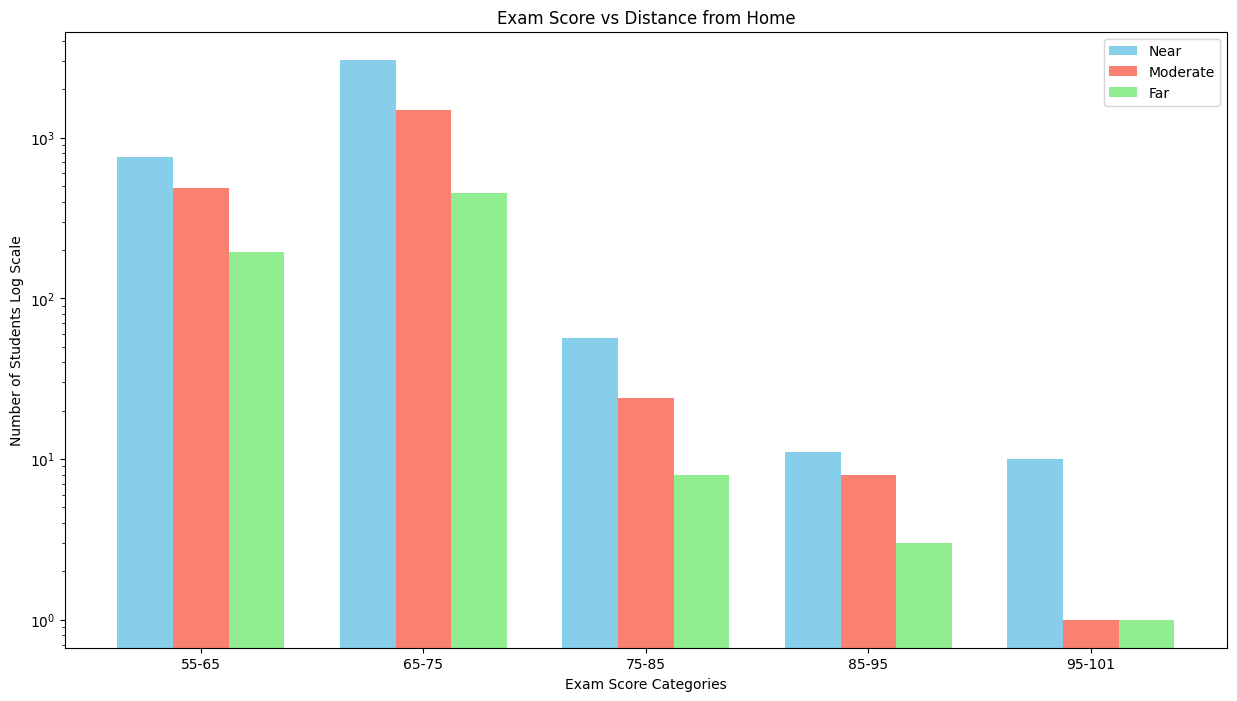

In [ ]:


bins = [55, 65, 75, 85, 95, 101]
labels = ['55-65', '65-75', '75-85', '85-95', '95-101']

near = pd.cut(df[df['Distance_from_Home'] == 'Near']['Exam_Score'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().reindex(labels, fill_value=0)
moderate = pd.cut(df[df['Distance_from_Home'] == 'Moderate']['Exam_Score'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().reindex(labels, fill_value=0)
far = pd.cut(df[df['Distance_from_Home'] == 'Far']['Exam_Score'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(15, 8))

x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, near, width, label='Near', color='skyblue')
plt.bar(x, moderate, width, label='Moderate', color='salmon')
plt.bar(x + width, far, width, label='Far', color='lightgreen')

plt.yscale('log')

plt.xlabel('Exam Score Categories')
plt.ylabel('Number of Students Log Scale')
plt.title('Exam Score vs Distance from Home')
plt.xticks(x, labels)
plt.legend()

plt.show()

## Explore relationships between features and other features

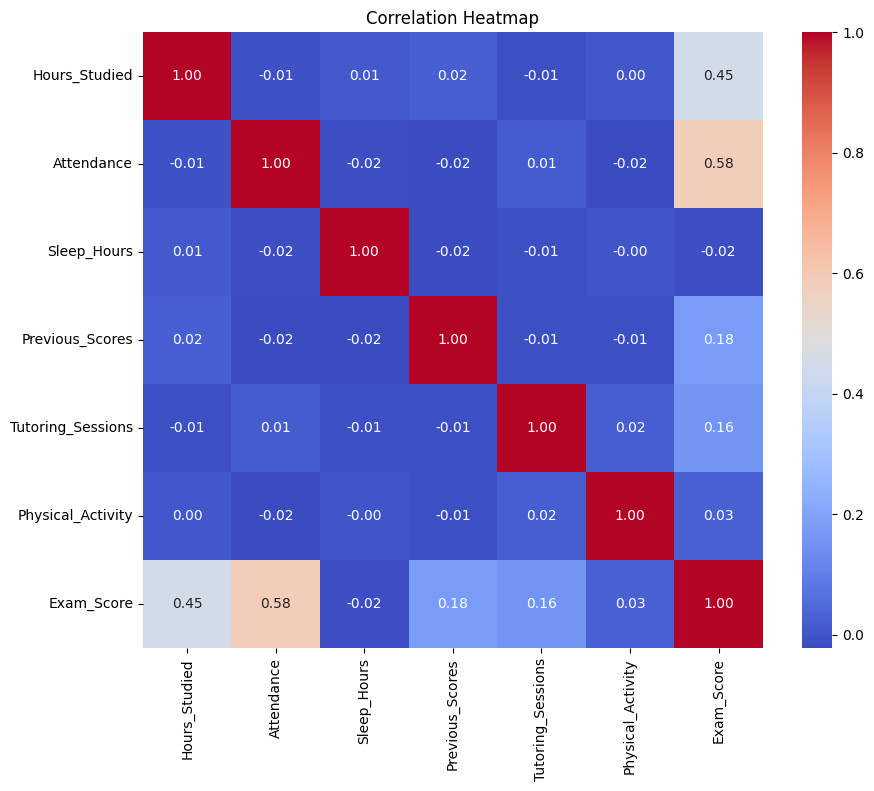

In [ ]:
plt.figure(figsize=(10, 8))
numerical_features= df.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


* Insight : Does Family income affect on School type?


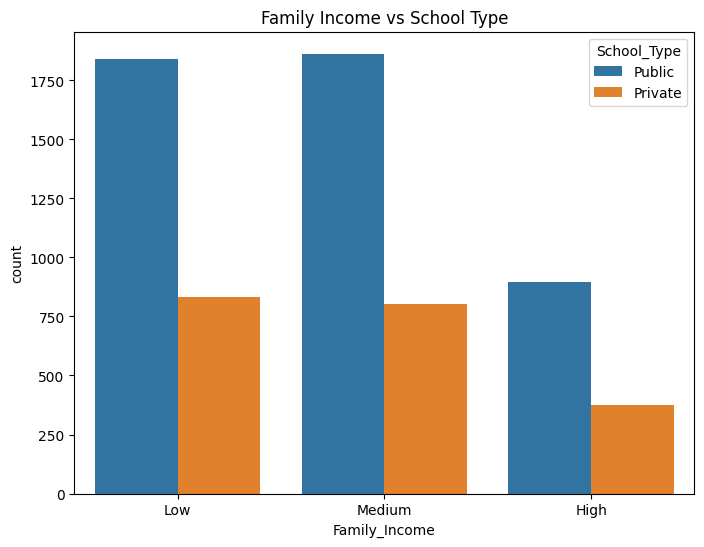

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_Income', hue='School_Type', data=df)
plt.title('Family Income vs School Type')
plt.show()


* Insight: Does school distance affect student attendance and what about Gender?

In [ ]:
df['Distance_from_Home'].value_counts()

,count
Distance_from_Home,
Near,3884
Moderate,1998
Far,658


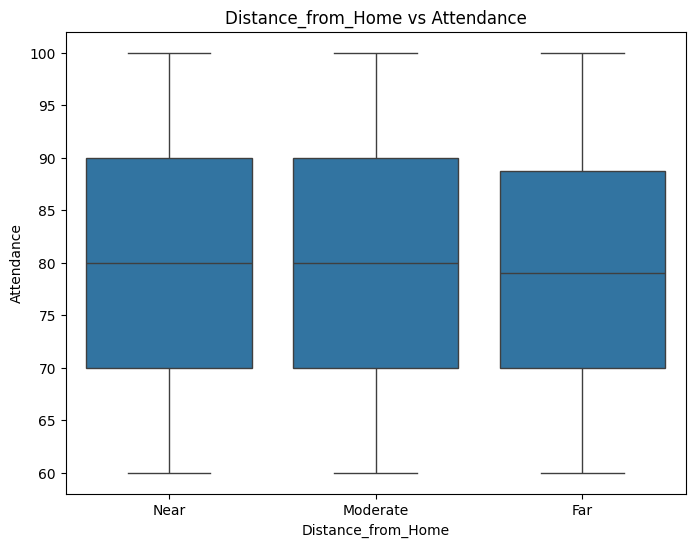

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Distance_from_Home', y='Attendance', data=df)
plt.title('Distance_from_Home vs Attendance')
plt.show()


Text(0, 0.5, 'Exam Score')

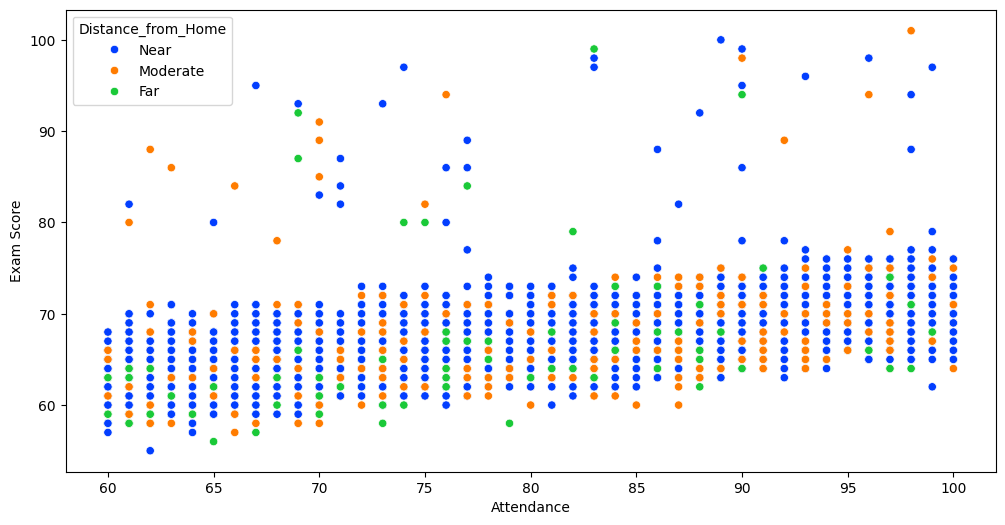

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df, hue='Distance_from_Home', palette='bright')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')

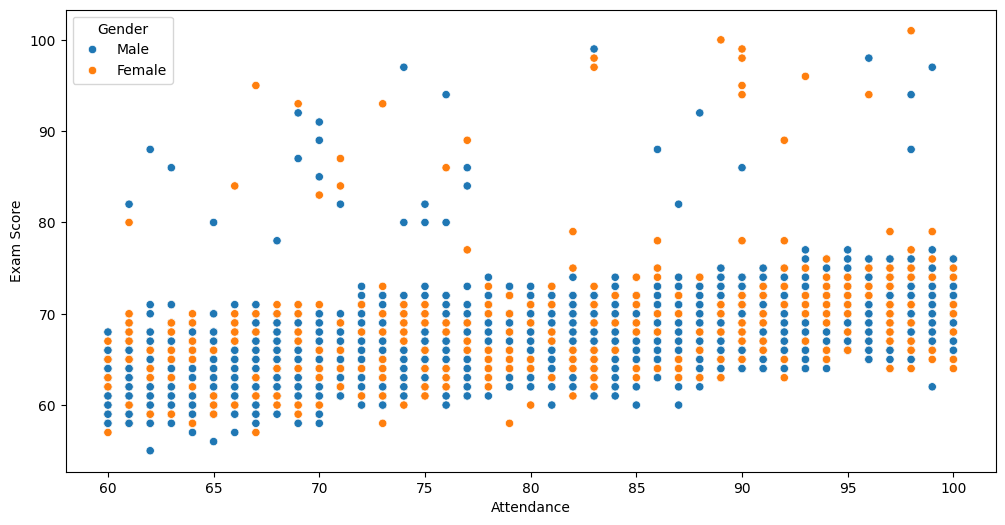

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df, hue='Gender')
plt.xlabel('Attendance')
plt.ylabel('Exam Score');

* Insight : Does the number of study hours differ between genders in terms of exam achievement?

Text(0, 0.5, 'Exam Score')

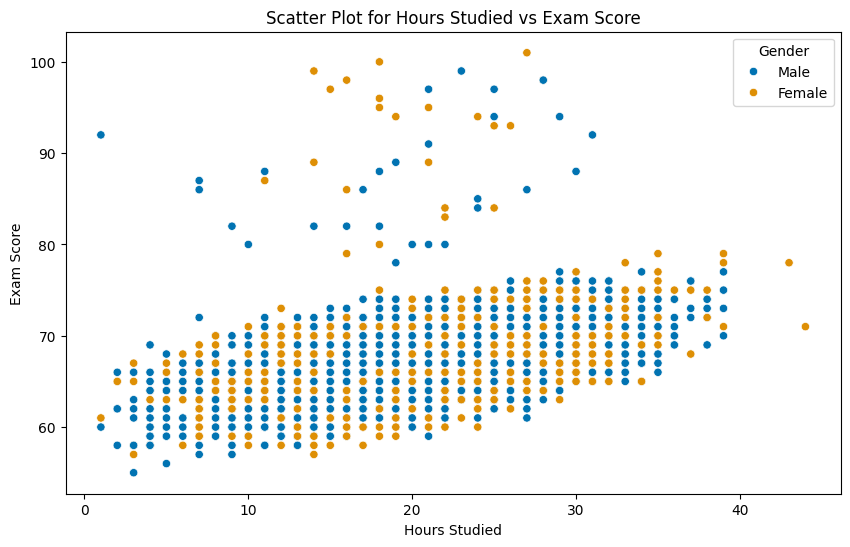

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, hue='Gender', palette='colorblind')
plt.title('Scatter Plot for Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

* Insight : Does the absence of internet affect students' motivation? And what about the quality of the teacher?



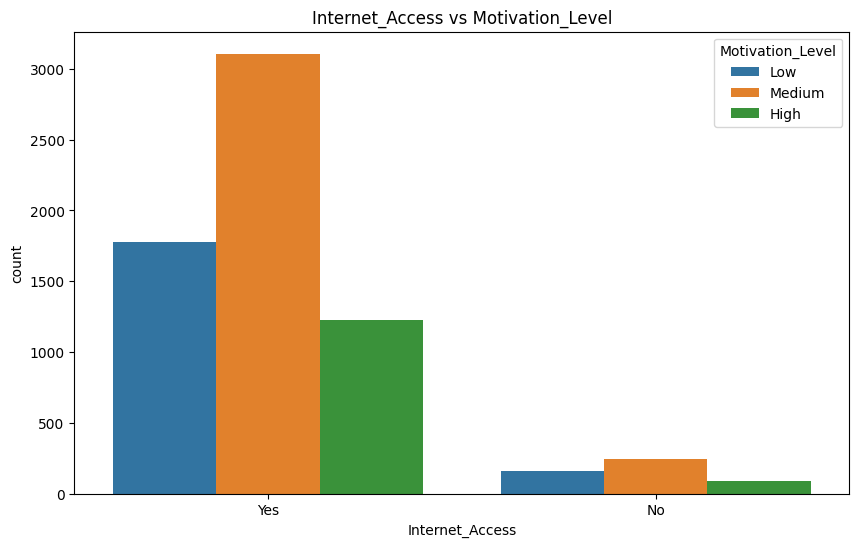

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(hue='Motivation_Level', x='Internet_Access', data=df)
plt.title('Internet_Access vs Motivation_Level')
plt.show()

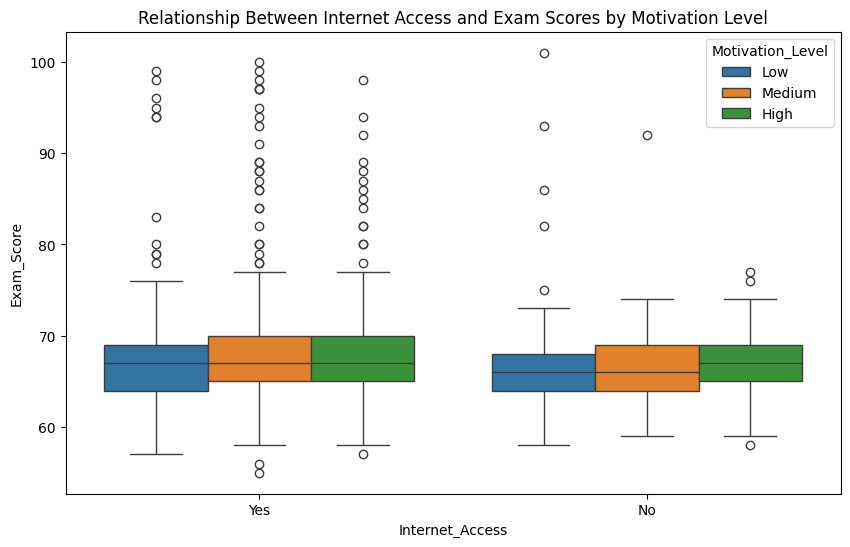

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Internet_Access', y='Exam_Score', hue='Motivation_Level', data=df)
plt.title('Relationship Between Internet Access and Exam Scores by Motivation Level')
plt.show()

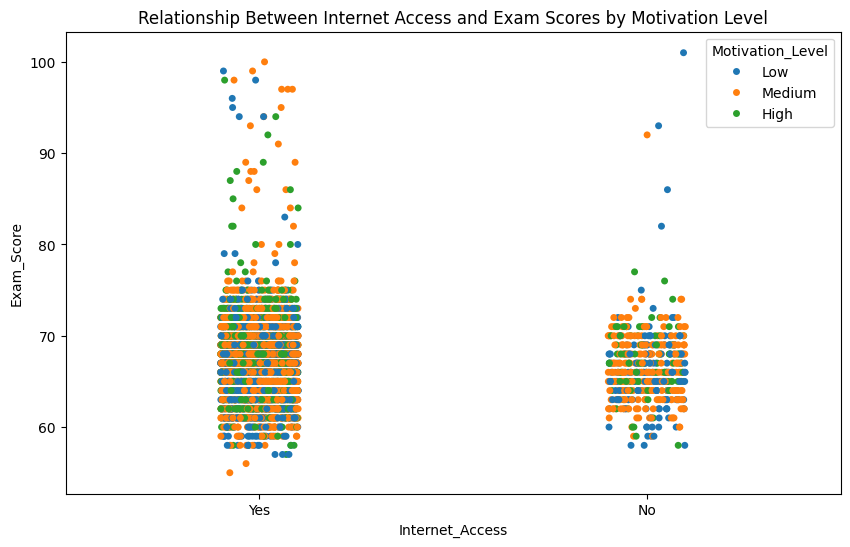

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Internet_Access', y='Exam_Score', hue='Motivation_Level', data=df)
plt.title('Relationship Between Internet Access and Exam Scores by Motivation Level')
plt.show()

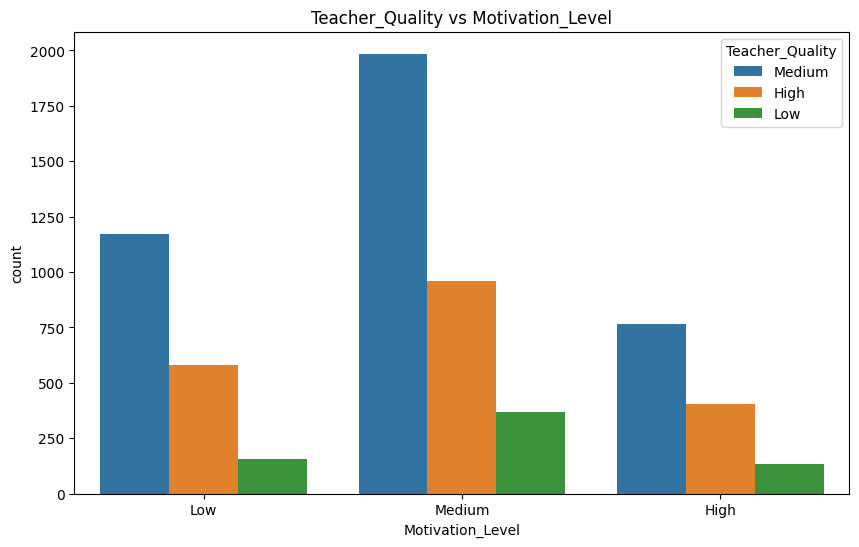

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Motivation_Level', hue='Teacher_Quality', data=df)
plt.title('Teacher_Quality vs Motivation_Level')
plt.show()


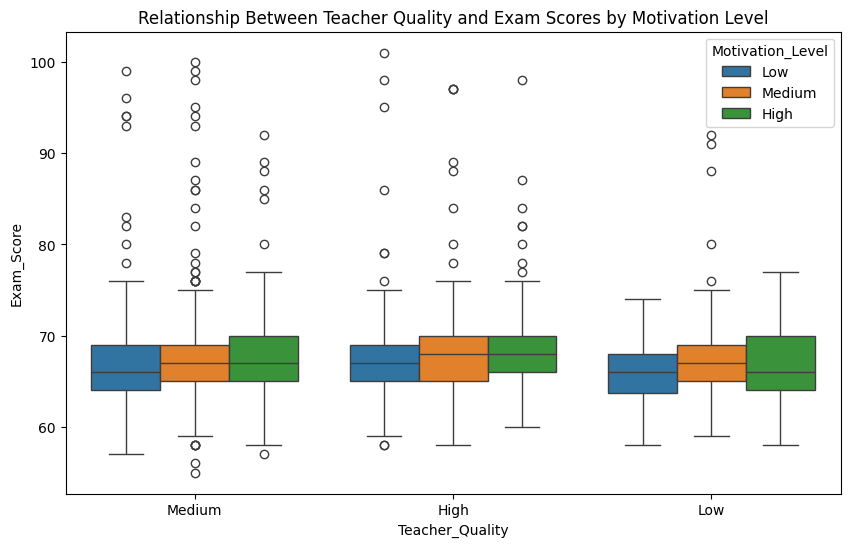

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Teacher_Quality', y='Exam_Score', hue='Motivation_Level', data=df)
plt.title('Relationship Between Teacher Quality and Exam Scores by Motivation Level')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

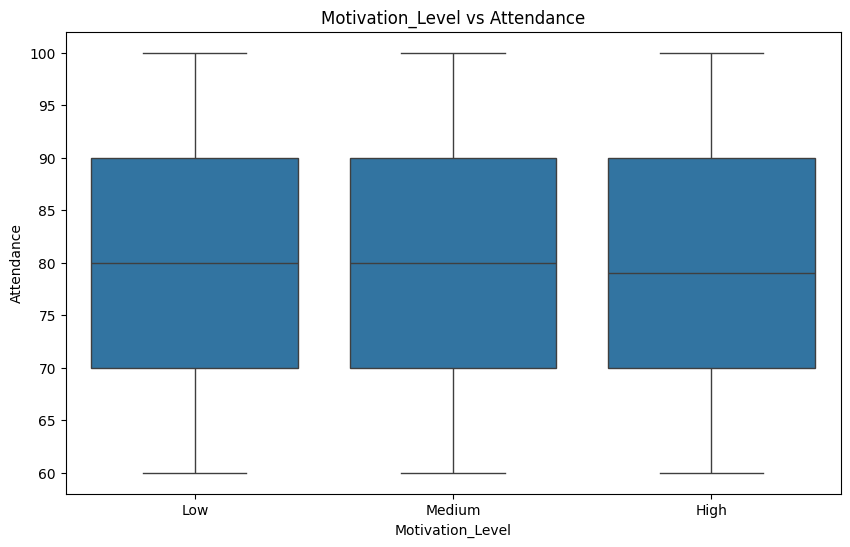

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Motivation_Level', y='Attendance', data=df)
plt.title('Motivation_Level vs Attendance')
plt.show()

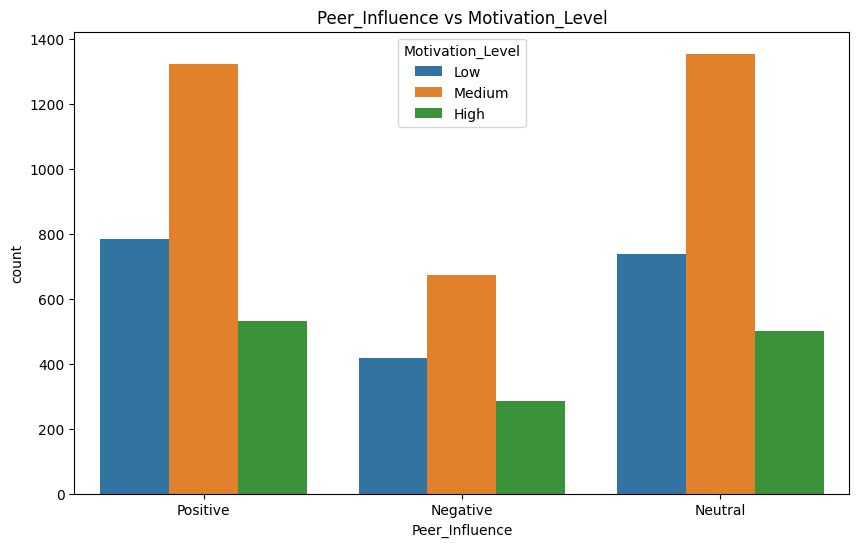

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Peer_Influence', hue='Motivation_Level', data=df)
plt.title('Peer_Influence vs Motivation_Level')
plt.show()


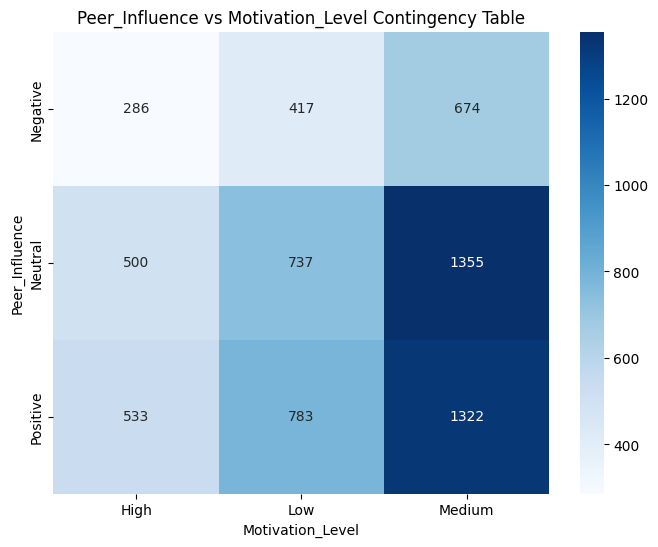

In [ ]:
contingency_table = pd.crosstab(df['Peer_Influence'], df['Motivation_Level'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Peer_Influence vs Motivation_Level Contingency Table')
plt.show()


In [ ]:
533/1319

0.4040940106141016

In [ ]:
500/1319

0.37907505686125853

In [ ]:
286/1319

0.2168309325246399

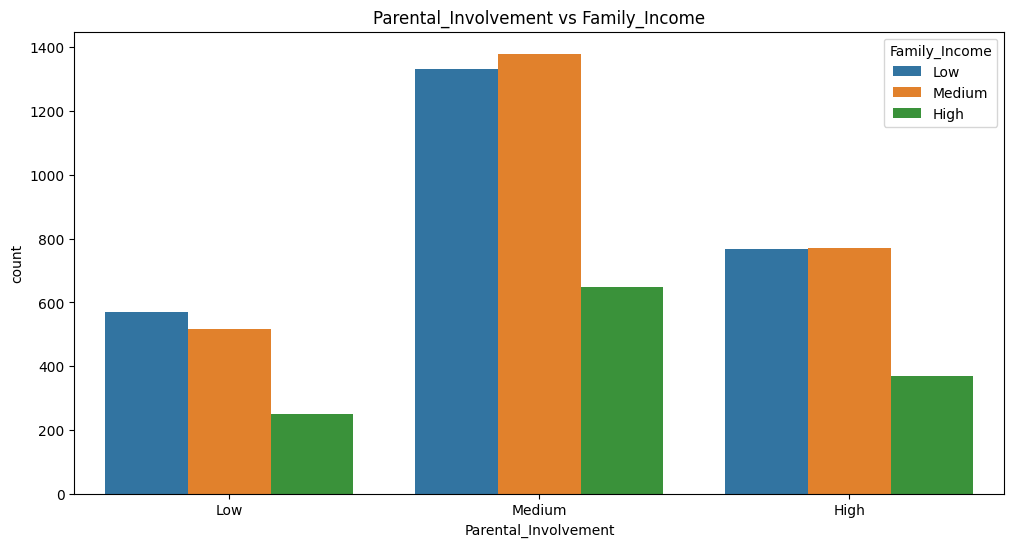

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Parental_Involvement', hue='Family_Income', data=df)
plt.title('Parental_Involvement vs Family_Income')
plt.show()

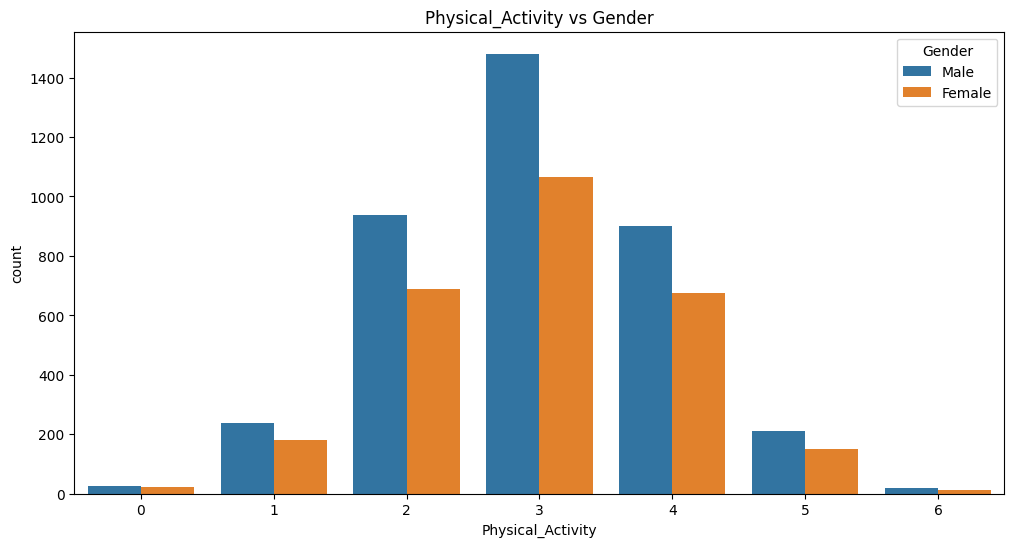

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Physical_Activity', hue='Gender', data=df)
plt.title('Physical_Activity vs Gender')
plt.show()

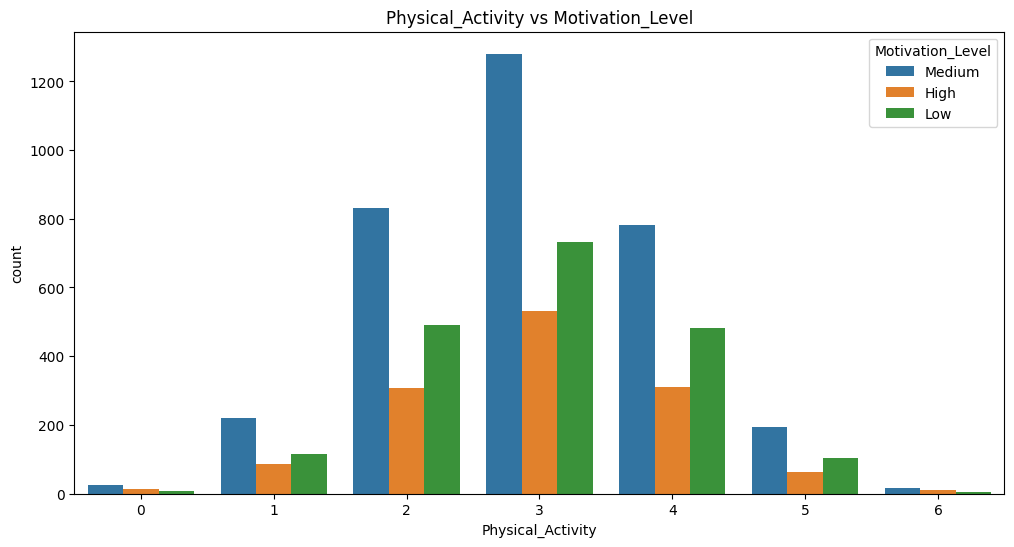

In [ ]:

plt.figure(figsize=(12,6))
sns.countplot(x='Physical_Activity', hue='Motivation_Level', data=df)
plt.title('Physical_Activity vs Motivation_Level')
plt.show()

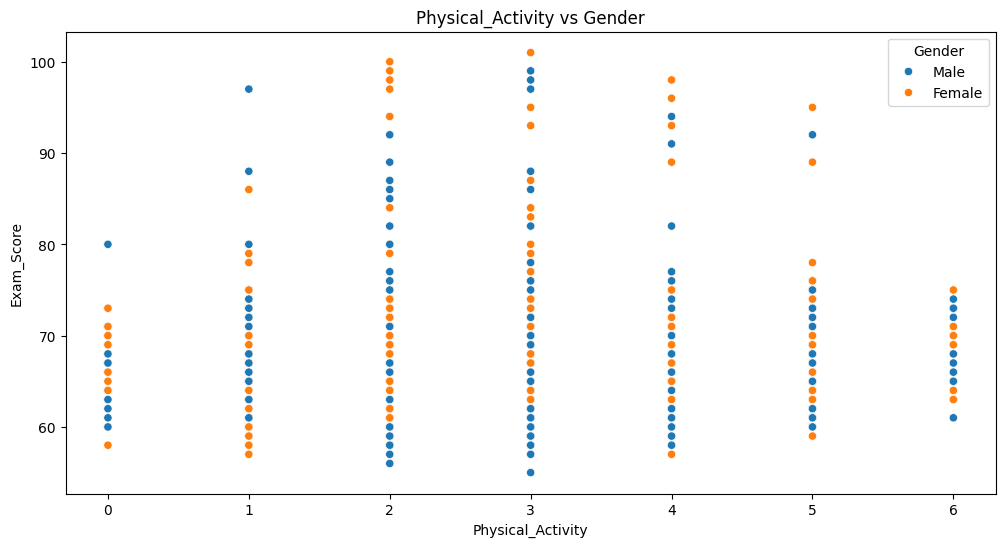

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Physical_Activity', y='Exam_Score', hue='Gender', data=df)
plt.title('Physical_Activity vs Gender')
plt.show()



#Cleaning Data

### Type Conversion

In [ ]:
X_train.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
X_train['Teacher_Quality'].value_counts()

,count
Teacher_Quality,
Medium,2353
High,1164
Low,403


In [ ]:

X_train['Parental_Education_Level'].value_counts()


,count
Parental_Education_Level,
High School,1951
College,1189
Postgraduate,783


In [ ]:
from sklearn.impute import SimpleImputer

print("\nMissing Values in Each Column Before Imputation:")
print(X_train.isnull().sum())

Teacher_Quality_imputer = SimpleImputer(strategy='most_frequent')
Parental_Education_Level_imputer = SimpleImputer(strategy='most_frequent')
Distance_from_Home_imputer = SimpleImputer(strategy='most_frequent')


X_train['Teacher_Quality'] = Teacher_Quality_imputer.fit_transform(X_train[['Teacher_Quality']]).flatten()
X_train['Parental_Education_Level'] = Parental_Education_Level_imputer.fit_transform(X_train[['Parental_Education_Level']]).flatten()
X_train['Distance_from_Home'] = Distance_from_Home_imputer.fit_transform(X_train[['Distance_from_Home']]).flatten()


print("\nMissing Values in Each Column After Imputation:")
print(X_train.isnull().sum())


Missing Values in Each Column Before Imputation:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               44
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      41
Distance_from_Home            43
Gender                         0
dtype: int64

Missing Values in Each Column After Imputation:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Inter

In [ ]:
X_train

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
3660,18,71,High,Medium,No,9,71,Medium,Yes,1,Medium,High,Public,Positive,3,No,High School,Moderate,Female
3230,17,82,Medium,High,No,6,65,Low,Yes,4,Low,Medium,Private,Positive,3,No,High School,Moderate,Female
3702,15,65,Low,High,Yes,8,52,Medium,Yes,4,Low,Medium,Private,Neutral,3,Yes,High School,Moderate,Female
2021,22,91,High,Medium,Yes,8,76,Low,Yes,2,Medium,Medium,Public,Neutral,3,No,College,Moderate,Female
1235,30,73,High,Medium,Yes,8,100,Medium,Yes,2,High,High,Public,Neutral,2,No,High School,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,28,87,Low,Low,Yes,7,57,Medium,Yes,2,Medium,High,Private,Negative,4,No,High School,Moderate,Male
5774,22,80,Medium,Medium,Yes,8,61,High,Yes,1,Low,Medium,Public,Positive,2,No,College,Moderate,Male
640,18,74,Medium,Medium,No,6,56,Medium,Yes,1,Medium,Medium,Private,Positive,3,No,College,Moderate,Male
6018,19,92,Low,Medium,Yes,7,70,Low,Yes,2,High,Medium,Private,Positive,2,No,College,Near,Male


### Encoding categorical variables


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)


X_train_encoded = one_hot_encoder.fit_transform(X_train[['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level','Family_Income', 'Teacher_Quality', 'Parental_Education_Level','Distance_from_Home', 'Peer_Influence']])

X_train_encoded = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level','Family_Income', 'Teacher_Quality', 'Parental_Education_Level','Distance_from_Home', 'Peer_Influence']), index=X_train.index)

X_train = pd.concat([X_train.drop(['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home', 'Peer_Influence'], axis=1), X_train_encoded], axis=1)


In [ ]:
X_train

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,...,Family_Income_Low,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Peer_Influence_Neutral,Peer_Influence_Positive
3660,18,71,No,9,71,Yes,1,Public,3,No,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3230,17,82,No,6,65,Yes,4,Private,3,No,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3702,15,65,Yes,8,52,Yes,4,Private,3,Yes,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2021,22,91,Yes,8,76,Yes,2,Public,3,No,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1235,30,73,Yes,8,100,Yes,2,Public,2,No,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,28,87,Yes,7,57,Yes,2,Private,4,No,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5774,22,80,Yes,8,61,Yes,1,Public,2,No,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
640,18,74,No,6,56,Yes,1,Private,3,No,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6018,19,92,Yes,7,70,Yes,2,Private,2,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:


label_encoder = LabelEncoder()

for col in ['Gender', 'Learning_Disabilities', 'School_Type', 'Internet_Access', 'Extracurricular_Activities']:
    X_train[col] = label_encoder.fit_transform(X_train[col])

In [ ]:
X_train

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,...,Family_Income_Low,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Peer_Influence_Neutral,Peer_Influence_Positive
3660,18,71,0,9,71,1,1,1,3,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3230,17,82,0,6,65,1,4,0,3,0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3702,15,65,1,8,52,1,4,0,3,1,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2021,22,91,1,8,76,1,2,1,3,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1235,30,73,1,8,100,1,2,1,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,28,87,1,7,57,1,2,0,4,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5774,22,80,1,8,61,1,1,1,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
640,18,74,0,6,56,1,1,0,3,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6018,19,92,1,7,70,1,2,0,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


###Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler_features = ['Hours_Studied','Attendance','Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

X_train[standard_scaler_features] = standard_scaler.fit_transform(X_train[standard_scaler_features])

In [ ]:
X_train

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,...,Family_Income_Low,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Peer_Influence_Neutral,Peer_Influence_Positive
3660,-0.329721,-0.764414,0,1.343531,-0.282851,1,-0.386489,1,0.041663,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3230,-0.498695,0.187996,0,-0.706940,-0.696789,1,2.037626,0,0.041663,0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3702,-0.836642,-1.283911,1,0.660041,-1.593655,1,2.037626,0,0.041663,1,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2021,0.346175,0.967241,1,0.660041,0.062098,1,0.421550,1,0.041663,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1235,1.697966,-0.591249,1,0.660041,1.717851,1,0.421550,1,-0.924146,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,1.360018,0.620910,1,-0.023450,-1.248707,1,0.421550,0,1.007473,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5774,0.346175,0.014831,1,0.660041,-0.972748,1,-0.386489,1,-0.924146,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
640,-0.329721,-0.504666,0,-0.706940,-1.317697,1,-0.386489,0,0.041663,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6018,-0.160747,1.053824,1,-0.023450,-0.351841,1,0.421550,0,-0.924146,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


class ColumnImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean', column_name=None):
        self.strategy = strategy
        self.column_name = column_name
        self.imputer = SimpleImputer(strategy=self.strategy)

    def fit(self, X, y=None):
        self.imputer.fit(X[[self.column_name]])
        return self
    ""
    def transform(self, X):
        X_copy = X.copy()
        if self.strategy == 'most_frequent':
            X_copy[self.column_name] = self.imputer.transform(X[[self.column_name]]).flatten()
        else:
            X_copy[self.column_name] = self.imputer.transform(X[[self.column_name]])
        return X_copy


class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        if self.columns:
            for col in self.columns:
                self.encoders[col] = LabelEncoder()
                self.encoders[col].fit(X[col])
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.columns:
            for col in self.columns:
                X_copy[col] = self.encoders[col].transform(X_copy[col])
        return X_copy

class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

    def fit(self, X, y=None):
        if self.columns:
            self.onehot_encoder.fit(X[self.columns])
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.columns:
            encoded_data = self.onehot_encoder.transform(X_copy[self.columns])
            encoded_df = pd.DataFrame(encoded_data,
                                      columns=self.onehot_encoder.get_feature_names_out(self.columns),
                                      index=X_copy.index)
            X_copy = pd.concat([X_copy.drop(self.columns, axis=1), encoded_df], axis=1)
        return X_copy

class ScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, standard_scaler_features=None):
        self.standard_scaler_features = standard_scaler_features
        self.standard_scaler = StandardScaler()

    def fit(self, X, y=None):
        if self.standard_scaler_features:
            self.standard_scaler.fit(X[self.standard_scaler_features])
        return self

    def transform(self, X):
        X_copy = X.copy()

        if self.standard_scaler_features:
            X_copy[self.standard_scaler_features] = self.standard_scaler.transform(X_copy[self.standard_scaler_features])

        return X_copy


In [ ]:
y_train

,Exam_Score
3660,65
3230,67
3702,61
2021,71
1235,72
...,...
808,68
5774,67
640,64
6018,69


In [ ]:
y_train_copy

,Exam_Score
3660,65
3230,67
3702,61
2021,71
1235,72
...,...
808,68
5774,67
640,64
6018,69


In [ ]:

standard_scaler_features=['Hours_Studied','Attendance','Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
one_hot_encoder_features=['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level','Family_Income', 'Teacher_Quality', 'Parental_Education_Level','Distance_from_Home', 'Peer_Influence']
label_encoder_features=['Gender', 'Learning_Disabilities', 'School_Type', 'Internet_Access', 'Extracurricular_Activities']

In [ ]:
from sklearn.pipeline import Pipeline
y_train_cleaned = pd.DataFrame(y_train_copy)

y_train_cleaned = y_train_cleaned['Exam_Score']

pipeline = Pipeline(steps=[
    ('Teacher_Quality_imputer', ColumnImputer(strategy='most_frequent', column_name='Teacher_Quality')),
    ('Parental_Education_Level_imputer', ColumnImputer(strategy='most_frequent', column_name='Parental_Education_Level')),
    ('Distance_from_Home_imputer', ColumnImputer(strategy='most_frequent', column_name='Distance_from_Home')),
    ('onehot_encoder', OneHotEncoderTransformer(columns=one_hot_encoder_features)),
    ('label_encoder', LabelEncoderTransformer(columns=label_encoder_features)),
    ('scaler', ScalerTransformer(standard_scaler_features=standard_scaler_features)),
])

X_train_cleaned = pipeline.fit_transform(X_train_copy)

In [ ]:
assert X_train_cleaned.equals(X_train)


In [ ]:
assert y_train_cleaned.equals(y_train)

In [ ]:
y_train

,Exam_Score
3660,65
3230,67
3702,61
2021,71
1235,72
...,...
808,68
5774,67
640,64
6018,69


In [ ]:
 X_train_cleaned.shape

(3964, 27)

In [ ]:
 X_train.shape

(3964, 27)

In [ ]:
 X_train_cleaned.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Internet_Access,0
Tutoring_Sessions,0
School_Type,0
Physical_Activity,0
Learning_Disabilities,0


In [ ]:
X_train.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Internet_Access,0
Tutoring_Sessions,0
School_Type,0
Physical_Activity,0
Learning_Disabilities,0


In [ ]:
y_val_cleaned = pd.DataFrame(y_val)
y_val_cleaned = y_val_cleaned['Exam_Score']

X_val_cleaned = pipeline.transform(X_val)

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


# Model Selection and Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_cleaned, y_train_cleaned)

y_train_pred_lin_reg = linear_regressor.predict(X_train_cleaned)
y_val_pred_lin_reg = linear_regressor.predict(X_val_cleaned)

mse_train_lin_reg = mean_squared_error(y_train_cleaned, y_train_pred_lin_reg)
mse_val_lin_reg = mean_squared_error(y_val_cleaned, y_val_pred_lin_reg)
r2_train_lin_reg = r2_score(y_train_cleaned, y_train_pred_lin_reg)
r2_val_lin_reg = r2_score(y_val_cleaned, y_val_pred_lin_reg)
mae_train_lin_reg = mean_absolute_error(y_train_cleaned, y_train_pred_lin_reg)
mae_val_lin_reg = mean_absolute_error(y_val_cleaned, y_val_pred_lin_reg)
mape_train_lin_reg = mean_absolute_percentage_error(y_train_cleaned, y_train_pred_lin_reg)
mape_val_lin_reg = mean_absolute_percentage_error(y_val_cleaned, y_val_pred_lin_reg)


print("Linear Regression MSE:")
print(f"Training MSE: {mse_train_lin_reg:.4f}")
print(f"Validation MSE: {mse_val_lin_reg:.4f}")
print(f"Training R2 Score: {r2_train_lin_reg:.4f}")
print(f"Validation R2 Score: {r2_val_lin_reg:.4f}")
print(f"Training MAE: {mae_train_lin_reg:.4f}")
print(f"Validation MAE: {mae_val_lin_reg:.4f}")
print(f"Training MAPE: {mape_train_lin_reg:.4f}")
print(f"Validation MAPE: {mape_val_lin_reg:.4f}")




Linear Regression MSE:
Training MSE: 3.7406
Validation MSE: 4.8561
Training R2 Score: 0.7425
Validation R2 Score: 0.7090
Training MAE: 0.4691
Validation MAE: 0.5199
Training MAPE: 0.0065
Validation MAPE: 0.0070


2.KNN regression


In [ ]:
from sklearn.neighbors import KNeighborsRegressor



knn_regressor = KNeighborsRegressor(n_neighbors=30)
knn_regressor.fit(X_train_cleaned, y_train_cleaned)

y_train_pred_knn_reg = knn_regressor.predict(X_train_cleaned)
y_val_pred_knn_reg = knn_regressor.predict(X_val_cleaned)

mse_train_knn_reg = mean_squared_error(y_train_cleaned, y_train_pred_knn_reg)
mse_val_knn_reg = mean_squared_error(y_val_cleaned, y_val_pred_knn_reg)
r2_train_knn_reg = r2_score(y_train_cleaned, y_train_pred_knn_reg)
r2_val_knn_reg = r2_score(y_val_cleaned, y_val_pred_knn_reg)
mae_train_knn_reg = mean_absolute_error(y_train_cleaned, y_train_pred_knn_reg)
mae_val_knn_reg = mean_absolute_error(y_val_cleaned, y_val_pred_knn_reg)
mape_train_knn_reg = mean_absolute_percentage_error(y_train_cleaned, y_train_pred_knn_reg)
mape_val_knn_reg = mean_absolute_percentage_error(y_val_cleaned, y_val_pred_knn_reg)


print("KNN Regression MSE:")
print(f"Training MSE: {mse_train_knn_reg:.4f}")
print(f"Validation MSE: {mse_val_knn_reg:.4f}")
print(f"Training R2 Score: {r2_train_knn_reg:.4f}")
print(f"Validation R2 Score: {r2_val_knn_reg:.4f}")
print(f"Training MAE: {mae_train_knn_reg:.4f}")
print(f"Validation MAE: {mae_val_knn_reg:.4f}")
print(f"Training MAPE: {mape_train_knn_reg:.4f}")
print(f"Validation MAPE: {mape_val_knn_reg:.4f}")



KNN Regression MSE:
Training MSE: 5.7327
Validation MSE: 7.6254
Training R2 Score: 0.6054
Validation R2 Score: 0.5431
Training MAE: 1.3640
Validation MAE: 1.5075
Training MAPE: 0.0200
Validation MAPE: 0.0219


3. Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeRegressor


decision_tree_model = DecisionTreeRegressor(random_state=42,max_depth=5,)
decision_tree_model.fit(X_train_cleaned, y_train_cleaned)

y_train_pred_dt = decision_tree_model.predict(X_train_cleaned)
y_val_pred_dt = decision_tree_model.predict(X_val_cleaned)

mse_train_dt = mean_squared_error(y_train_cleaned, y_train_pred_dt)
mse_val_dt = mean_squared_error(y_val_cleaned, y_val_pred_dt)
r2_train_dt = r2_score(y_train_cleaned, y_train_pred_dt)
r2_val_dt = r2_score(y_val_cleaned, y_val_pred_dt)
mae_train_dt = mean_absolute_error(y_train_cleaned, y_train_pred_dt)
mae_val_dt = mean_absolute_error(y_val_cleaned, y_val_pred_dt)
mape_train_dt = mean_absolute_percentage_error(y_train_cleaned, y_train_pred_dt)
mape_val_dt = mean_absolute_percentage_error(y_val_cleaned, y_val_pred_dt)

print("Decision Tree MSE:")
print(f"Training MSE: {mse_train_dt:.4f}")
print(f"Validation MSE: {mse_val_dt:.4f}")
print(f"Training R2 Score: {r2_train_dt:.4f}")
print(f"Validation R2 Score: {r2_val_dt:.4f}")
print(f"Training MAE: {mae_train_dt:.4f}")
print(f"Validation MAE: {mae_val_dt:.4f}")
print(f"Training MAPE: {mape_train_dt:.4f}")
print(f"Validation MAPE: {mape_val_dt:.4f}")




Decision Tree MSE:
Training MSE: 6.1878
Validation MSE: 8.4092
Training R2 Score: 0.5741
Validation R2 Score: 0.4961
Training MAE: 1.5302
Validation MAE: 1.7272
Training MAPE: 0.0224
Validation MAPE: 0.0250


4. Random Forest

### The best model is : Linear Regression

In [ ]:


random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=5)
random_forest_model.fit(X_train_cleaned, y_train_cleaned)

y_train_pred_rf = random_forest_model.predict(X_train_cleaned)
y_val_pred_rf = random_forest_model.predict(X_val_cleaned)

mse_train_rf = mean_squared_error(y_train_cleaned, y_train_pred_rf)
mse_val_rf = mean_squared_error(y_val_cleaned, y_val_pred_rf)
r2_train_rf = r2_score(y_train_cleaned, y_train_pred_rf)
r2_val_rf = r2_score(y_val_cleaned, y_val_pred_rf)
mae_train_rf = mean_absolute_error(y_train_cleaned, y_train_pred_rf)
mae_val_rf = mean_absolute_error(y_val_cleaned, y_val_pred_rf)
mape_train_rf = mean_absolute_percentage_error(y_train_cleaned, y_train_pred_rf)
mape_val_rf = mean_absolute_percentage_error(y_val_cleaned, y_val_pred_rf)

print("Random Forest MSE:")
print(f"Training MSE: {mse_train_rf:.4f}")
print(f"Validation MSE: {mse_val_rf:.4f}")
print(f"Training R2 Score: {r2_train_rf:.4f}")
print(f"Validation R2 Score: {r2_val_rf:.4f}")
print(f"Training MAE: {mae_train_rf:.4f}")
print(f"Validation MAE: {mae_val_rf:.4f}")
print(f"Training MAPE: {mape_train_rf:.4f}")
print(f"Validation MAPE: {mape_val_rf:.4f}")

Random Forest MSE:
Training MSE: 5.4972
Validation MSE: 7.6077
Training R2 Score: 0.6216
Validation R2 Score: 0.5441
Training MAE: 1.3878
Validation MAE: 1.5588
Training MAPE: 0.0203
Validation MAPE: 0.0225


### Train models using pipeline

In [ ]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=X['Gender'])

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify= X_temp_strat['Gender'])

In [ ]:
combined_pipeline = Pipeline(steps=[
    ('preprocessing', pipeline),
    ('model', LinearRegression())
])

In [ ]:
combined_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('Teacher_Quality_imputer',
                                  ColumnImputer(column_name='Teacher_Quality',
                                                strategy='most_frequent')),
                                 ('Parental_Education_Level_imputer',
                                  ColumnImputer(column_name='Parental_Education_Level',
                                                strategy='most_frequent')),
                                 ('Distance_from_Home_imputer',
                                  ColumnImputer(column_name='Distance_from_Home',
                                                strategy='...
                                                                    'Peer_Influence'])),
                                 ('label_encoder',
                                  LabelEncoderTransformer(columns=['Gender',
                                                                   'Learning_Disabilities',
                                                                   'School_Type',
                                                                   'Internet_Access',
                                                                   'Extracurricular_Activities'])),
                                 ('scaler',
                                  ScalerTransformer(standard_scaler_features=['Hours_Studied',
                                                                              'Attendance',
                                                                              'Sleep_Hours',
                                                                              'Previous_Scores',
                                                                              'Tutoring_Sessions',
                                                                              'Physical_Activity']))])),
                ('model', LinearRegression())])

In [ ]:
y_train_pred = combined_pipeline.predict(X_train)
y_val_pred = combined_pipeline.predict(X_val)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

print("Linear Regression MSE:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Training R2 Score: {train_r2:.4f}")
print(f"Validation R2 Score: {val_r2:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Training MAPE: {train_mape:.4f}")
print(f"Validation MAPE: {val_mape:.4f}")

Linear Regression MSE:
Training MSE: 3.7406
Validation MSE: 4.8561
Training R2 Score: 0.7425
Validation R2 Score: 0.7090
Training MAE: 0.4691
Validation MAE: 0.5199
Training MAPE: 0.0065
Validation MAPE: 0.0070


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
import pickle

best_pipeline = combined_pipeline

with open('model.pkl', 'wb') as file:
    pickle.dump(combined_pipeline, file)




best_pipeline


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('Teacher_Quality_imputer',
                                  ColumnImputer(column_name='Teacher_Quality',
                                                strategy='most_frequent')),
                                 ('Parental_Education_Level_imputer',
                                  ColumnImputer(column_name='Parental_Education_Level',
                                                strategy='most_frequent')),
                                 ('Distance_from_Home_imputer',
                                  ColumnImputer(column_name='Distance_from_Home',
                                                strategy='...
                                                                    'Peer_Influence'])),
                                 ('label_encoder',
                                  LabelEncoderTransformer(columns=['Gender',
                                                                   'Learning_Disabilities',
                                                                   'School_Type',
                                                                   'Internet_Access',
                                                                   'Extracurricular_Activities'])),
                                 ('scaler',
                                  ScalerTransformer(standard_scaler_features=['Hours_Studied',
                                                                              'Attendance',
                                                                              'Sleep_Hours',
                                                                              'Previous_Scores',
                                                                              'Tutoring_Sessions',
                                                                              'Physical_Activity']))])),
                ('model', LinearRegression())])

### Evaluate your system on the Test Set


In [ ]:

with open('/content/model.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

    y_test_pred = loaded_pipeline.predict(X_test)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    print("Test MSE:", test_mse)
    print("Test R2 Score:", test_r2)
    print("Test MAE:", test_mae)
    print("Test MAPE:", test_mape)


Test MSE: 4.613006594165219
Test R2 Score: 0.6995705817480029
Test MAE: 0.5140914846111488
Test MAPE: 0.006953373031103247


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
